# CONTENTS

- ENVIRONMENT SETUP
- IMPORTING DATA
- DATA OVERVIEW
- SUBSETTING
- EDA (EXPLORATORY DATA ANALYSIS)
- ORDERS & CUSTOMER BEHAVIOR
- ANALYSIS QUESTIONS
- RECOMMENDATIONS


# ENVIRONMENT SETUP

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import seaborn as sns
import os

In [2]:
# initialize path variable
path = r'/Users/smac_/Documents/Career/Application Package/Portfolio/Projects/Instacart Sales Analysis'

# IMPORTING DATA

In [3]:
# import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_final.pkl'))

In [4]:
# set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# DATA OVERVIEW

In [5]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,gender,state,age,date_joined,dependants,marital_status,income,department,price_range,max_order,loyalty_flag,mean_spending,spending_flag,median_frequency,frequency_flag,income_class,region,activity_flag,age_flag,is_parent,hour_period
0,2539329,1,1,2,8,<NA>,196,1,No,Soda,77,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Mid-range Product,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Lower Class,South,Recurrent Activity,Early Adulthood,Yes,AM
1,2398795,1,2,3,7,15,196,1,Yes,Soda,77,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Mid-range Product,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Lower Class,South,Recurrent Activity,Early Adulthood,Yes,AM
2,473747,1,3,3,12,21,196,1,Yes,Soda,77,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Mid-range Product,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Lower Class,South,Recurrent Activity,Early Adulthood,Yes,PM
3,2254736,1,4,4,7,29,196,1,Yes,Soda,77,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Mid-range Product,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Lower Class,South,Recurrent Activity,Early Adulthood,Yes,AM
4,431534,1,5,4,15,28,196,1,Yes,Soda,77,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Mid-range Product,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Lower Class,South,Recurrent Activity,Early Adulthood,Yes,PM


In [6]:
df.tail()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,gender,state,age,date_joined,dependants,marital_status,income,department,price_range,max_order,loyalty_flag,mean_spending,spending_flag,median_frequency,frequency_flag,income_class,region,activity_flag,age_flag,is_parent,hour_period
32408156,532733,1860,4,2,18,15,5161,1,No,Dried Mango,18,10,6.1,Female,New Hampshire,35,3/13/2019,1,married,37960,bulk,Mid-range Product,4,New Customer,2.725000,Low Spender,28.0,Non-frequent Customer,Lower Class,Northeast,Low Activity,Early Adulthood,Yes,PM
32408994,1565024,152886,2,1,9,30,1000,3,No,Apricots,18,10,12.9,Male,Pennsylvania,45,7/9/2017,1,married,41662,bulk,Mid-range Product,13,Regular Customer,6.811111,Low Spender,30.0,Non-frequent Customer,Lower Class,Northeast,Recurrent Activity,Middle Adulthood,Yes,AM
32417109,2288597,87619,3,3,11,23,5161,2,No,Dried Mango,18,10,6.1,Male,Alabama,47,2/17/2017,2,married,89341,bulk,Mid-range Product,4,New Customer,7.780000,Low Spender,18.5,Regular Customer,Middle Class,South,Low Activity,Middle Adulthood,Yes,AM
32421457,1064360,114159,3,6,15,30,42091,5,No,Pesto Sauce,68,10,5.7,Female,Montana,26,10/10/2017,1,married,80812,bulk,Mid-range Product,3,New Customer,7.535000,Low Spender,30.0,Non-frequent Customer,Lower-middle Class,West,Low Activity,Early Adulthood,Yes,PM
32431211,2858391,92664,1,0,15,<NA>,11325,1,No,Organic Hemp Plus Granola,68,10,12.4,Male,Washington,68,4/30/2019,0,divorced/widowed,44337,bulk,Mid-range Product,3,New Customer,4.450000,Low Spender,27.5,Non-frequent Customer,Lower Class,West,Low Activity,Late Adulthood,No,PM


In [7]:
df.dtypes

order_id                   object
user_id                    object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order      Int64
product_id                 object
add_to_cart_order           int64
reordered                  object
product_name               object
aisle_id                   object
department_id              object
prices                    float64
gender                     object
state                      object
age                         int64
date_joined                object
dependants                  int64
marital_status             object
income                      int64
department                 object
price_range                object
max_order                   int64
loyalty_flag               object
mean_spending             float64
spending_flag              object
median_frequency          Float64
frequency_flag             object
income_class               object
region        

In [8]:
df.shape

(32433030, 34)

# SUBSETTING

In [9]:
# set the seed & create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

# store 70% of the sample in the dataframe 'big'
big_df = df[dev]

# store 30% of the sample in the dataframe 'small'
small_df = df[~dev]

In [10]:
# total rows in original dataframe
len(df)

32433030

In [11]:
# samples rows added together
len(big_df) + len(small_df)

32433030

In [12]:
# Validate the subset by comparing distributions of key variables
key_vars = ['order_dow', 'order_hour_of_day']
for var in key_vars:
    print(f'Distribution of {var} in original dataset:')
    print(df[var].value_counts(normalize=True))
    print(f'Distribution of {var} in subset:')
    print(small_df[var].value_counts(normalize=True))
    print()

Distribution of order_dow in original dataset:
0    0.191453
1    0.174686
6    0.138751
2    0.130041
5    0.129785
3    0.118519
4    0.116765
Name: order_dow, dtype: float64
Distribution of order_dow in subset:
0    0.191553
1    0.174679
6    0.138771
2    0.129950
5    0.129780
3    0.118565
4    0.116703
Name: order_dow, dtype: float64

Distribution of order_hour_of_day in original dataset:
10    0.085231
11    0.084435
14    0.082985
15    0.082151
13    0.082113
12    0.080804
16    0.078234
9     0.075743
17    0.064422
8     0.053029
18    0.050500
19    0.038829
20    0.030123
7     0.027500
21    0.024553
22    0.019570
23    0.012413
6     0.008965
0     0.006750
1     0.003570
5     0.002715
2     0.002141
4     0.001643
3     0.001582
Name: order_hour_of_day, dtype: float64
Distribution of order_hour_of_day in subset:
10    0.085219
11    0.084546
14    0.082976
13    0.082099
15    0.082022
12    0.080744
16    0.078256
9     0.075759
17    0.064563
8     0.052884
18   

In [13]:
# Subset dataframe size
small_df.shape

(9729386, 34)

# EDA (EXPLORATORY DATA ANALYSIS)

In [14]:
# Select non-numeric columns
numeric_cols = small_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate descriptive statistics for numeric columns
numeric_stats = small_df[numeric_cols].describe().transpose()
numeric_stats

,count,mean,std,min,25%,50%,75%,max
order_number,9729386.0,17.141828,17.535927,1.0,5.0,11.0,24.0,99.0
order_dow,9729386.0,2.738607,2.090234,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,9729386.0,13.426383,4.246085,0.0,10.0,13.0,16.0,23.0
days_since_prior_order,9105856.0,11.105822,8.780518,0.0,5.0,8.0,15.0,30.0
add_to_cart_order,9729386.0,8.347966,7.11987,1.0,3.0,6.0,11.0,144.0
prices,9729386.0,7.796291,4.243111,1.0,4.2,7.4,11.3,25.0
age,9729386.0,49.466253,18.485927,18.0,33.0,49.0,65.0,81.0
dependants,9729386.0,1.502459,1.11896,0.0,1.0,2.0,3.0,3.0
income,9729386.0,99428.096786,43059.370054,25903.0,66997.0,96608.0,127876.0,593901.0
max_order,9729386.0,33.060426,25.156394,3.0,13.0,26.0,47.0,99.0


In [15]:
# Select non-numeric columns
non_numeric_cols = small_df.select_dtypes(exclude=['float64', 'int64']).columns

# Initialize a DataFrame to store the statistics
non_numeric_stats = pd.DataFrame(columns=['count', 'unique', 'top', 'freq'])

# Calculate descriptive statistics for each non-numeric column
for col in non_numeric_cols:
    counts = small_df[col].value_counts()
    top_value = counts.idxmax()
    freq = counts.max()
    non_numeric_stats.loc[col] = [small_df[col].count(), small_df[col].nunique(), top_value, freq]
non_numeric_stats

,count,unique,top,freq
order_id,9729386,2774848,1564244,51
user_id,9729386,205486,201268,1153
product_id,9729386,48399,24852,141631
reordered,9729386,2,Yes,5737924
product_name,9720801,48386,Banana,141631
aisle_id,9729386,134,24,1093571
department_id,9729386,21,4,2842670
gender,9729386,2,Male,4898436
state,9729386,51,Pennsylvania,200291
date_joined,9729386,1187,7/28/2018,11521


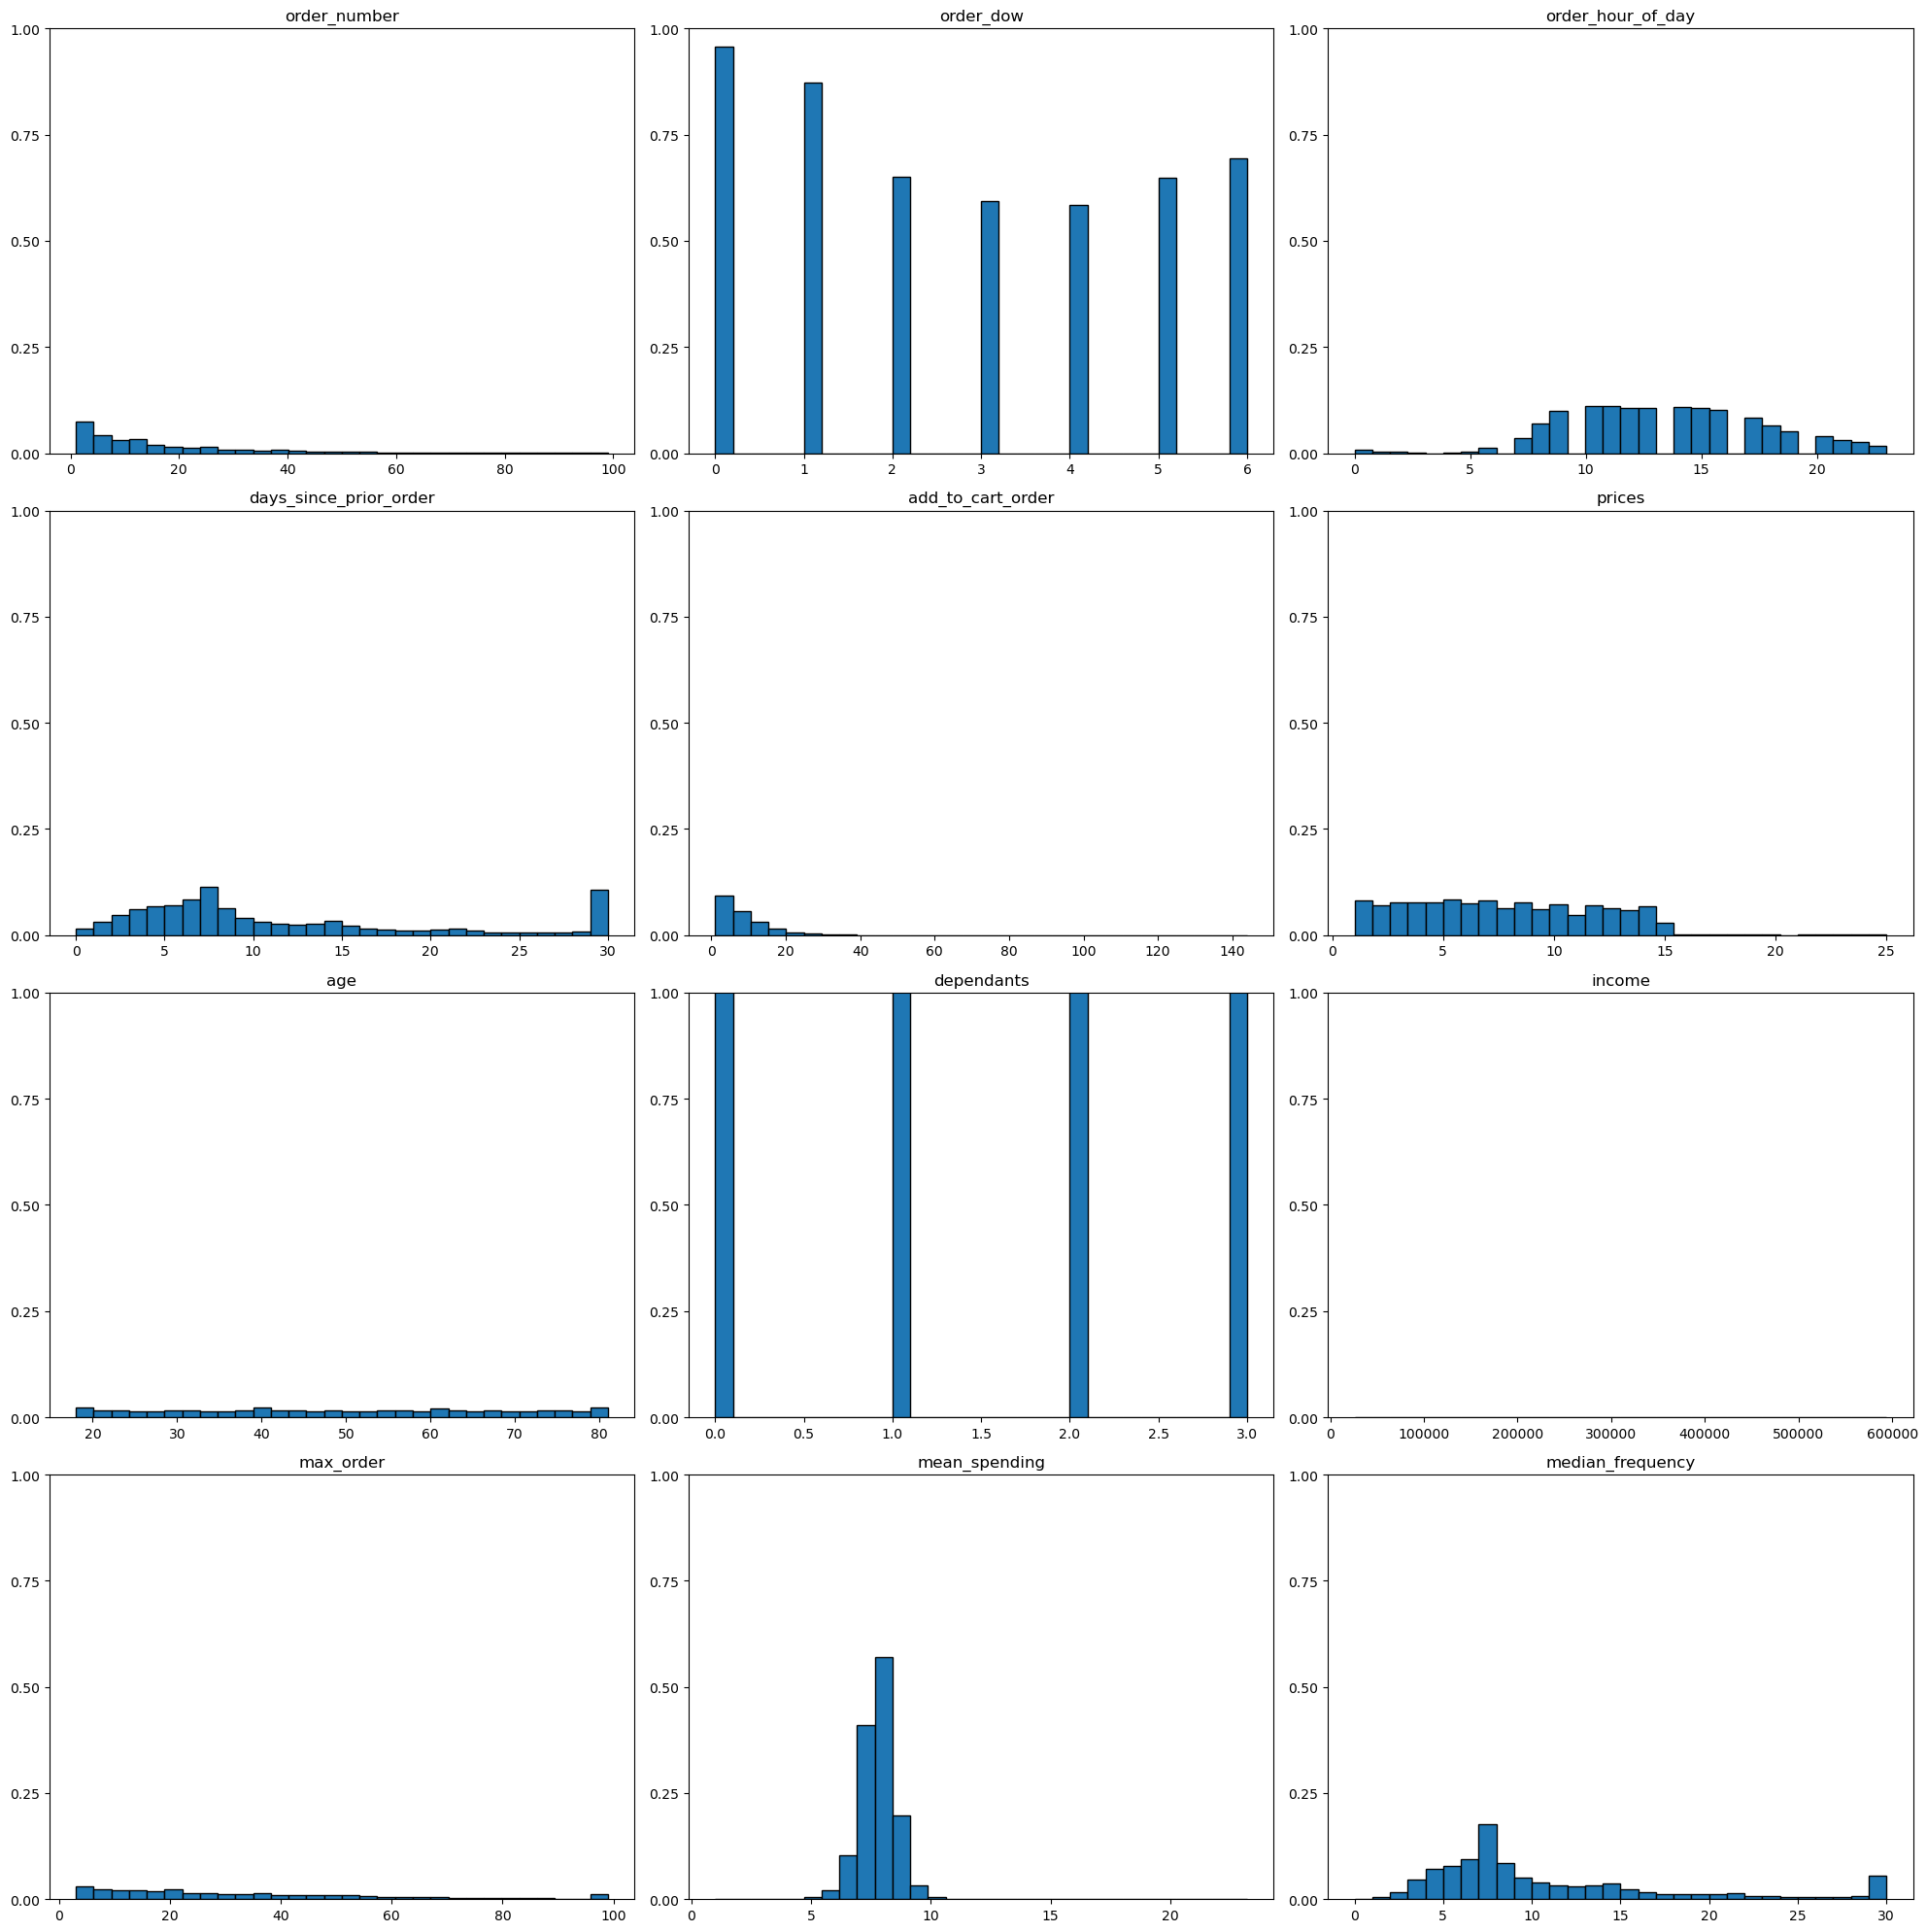

In [16]:
### Plot numeric columns to visualize distribution

# Number of columns for the grid layout
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Plot histograms for all numeric columns with normalized frequency counts and standardized y-axis
plt.figure(figsize=(20, n_rows * 5))  # Adjust the figure size as needed

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(small_df[col].dropna(), bins=30, edgecolor='k', density=True)  # Normalize frequency counts
    plt.title(col)
    plt.ylim(0, 1)  # Standardize y-axis range
    plt.yticks(np.linspace(0, 1, 5))  # Include only 5 tick marks

plt.tight_layout()
plt.show()

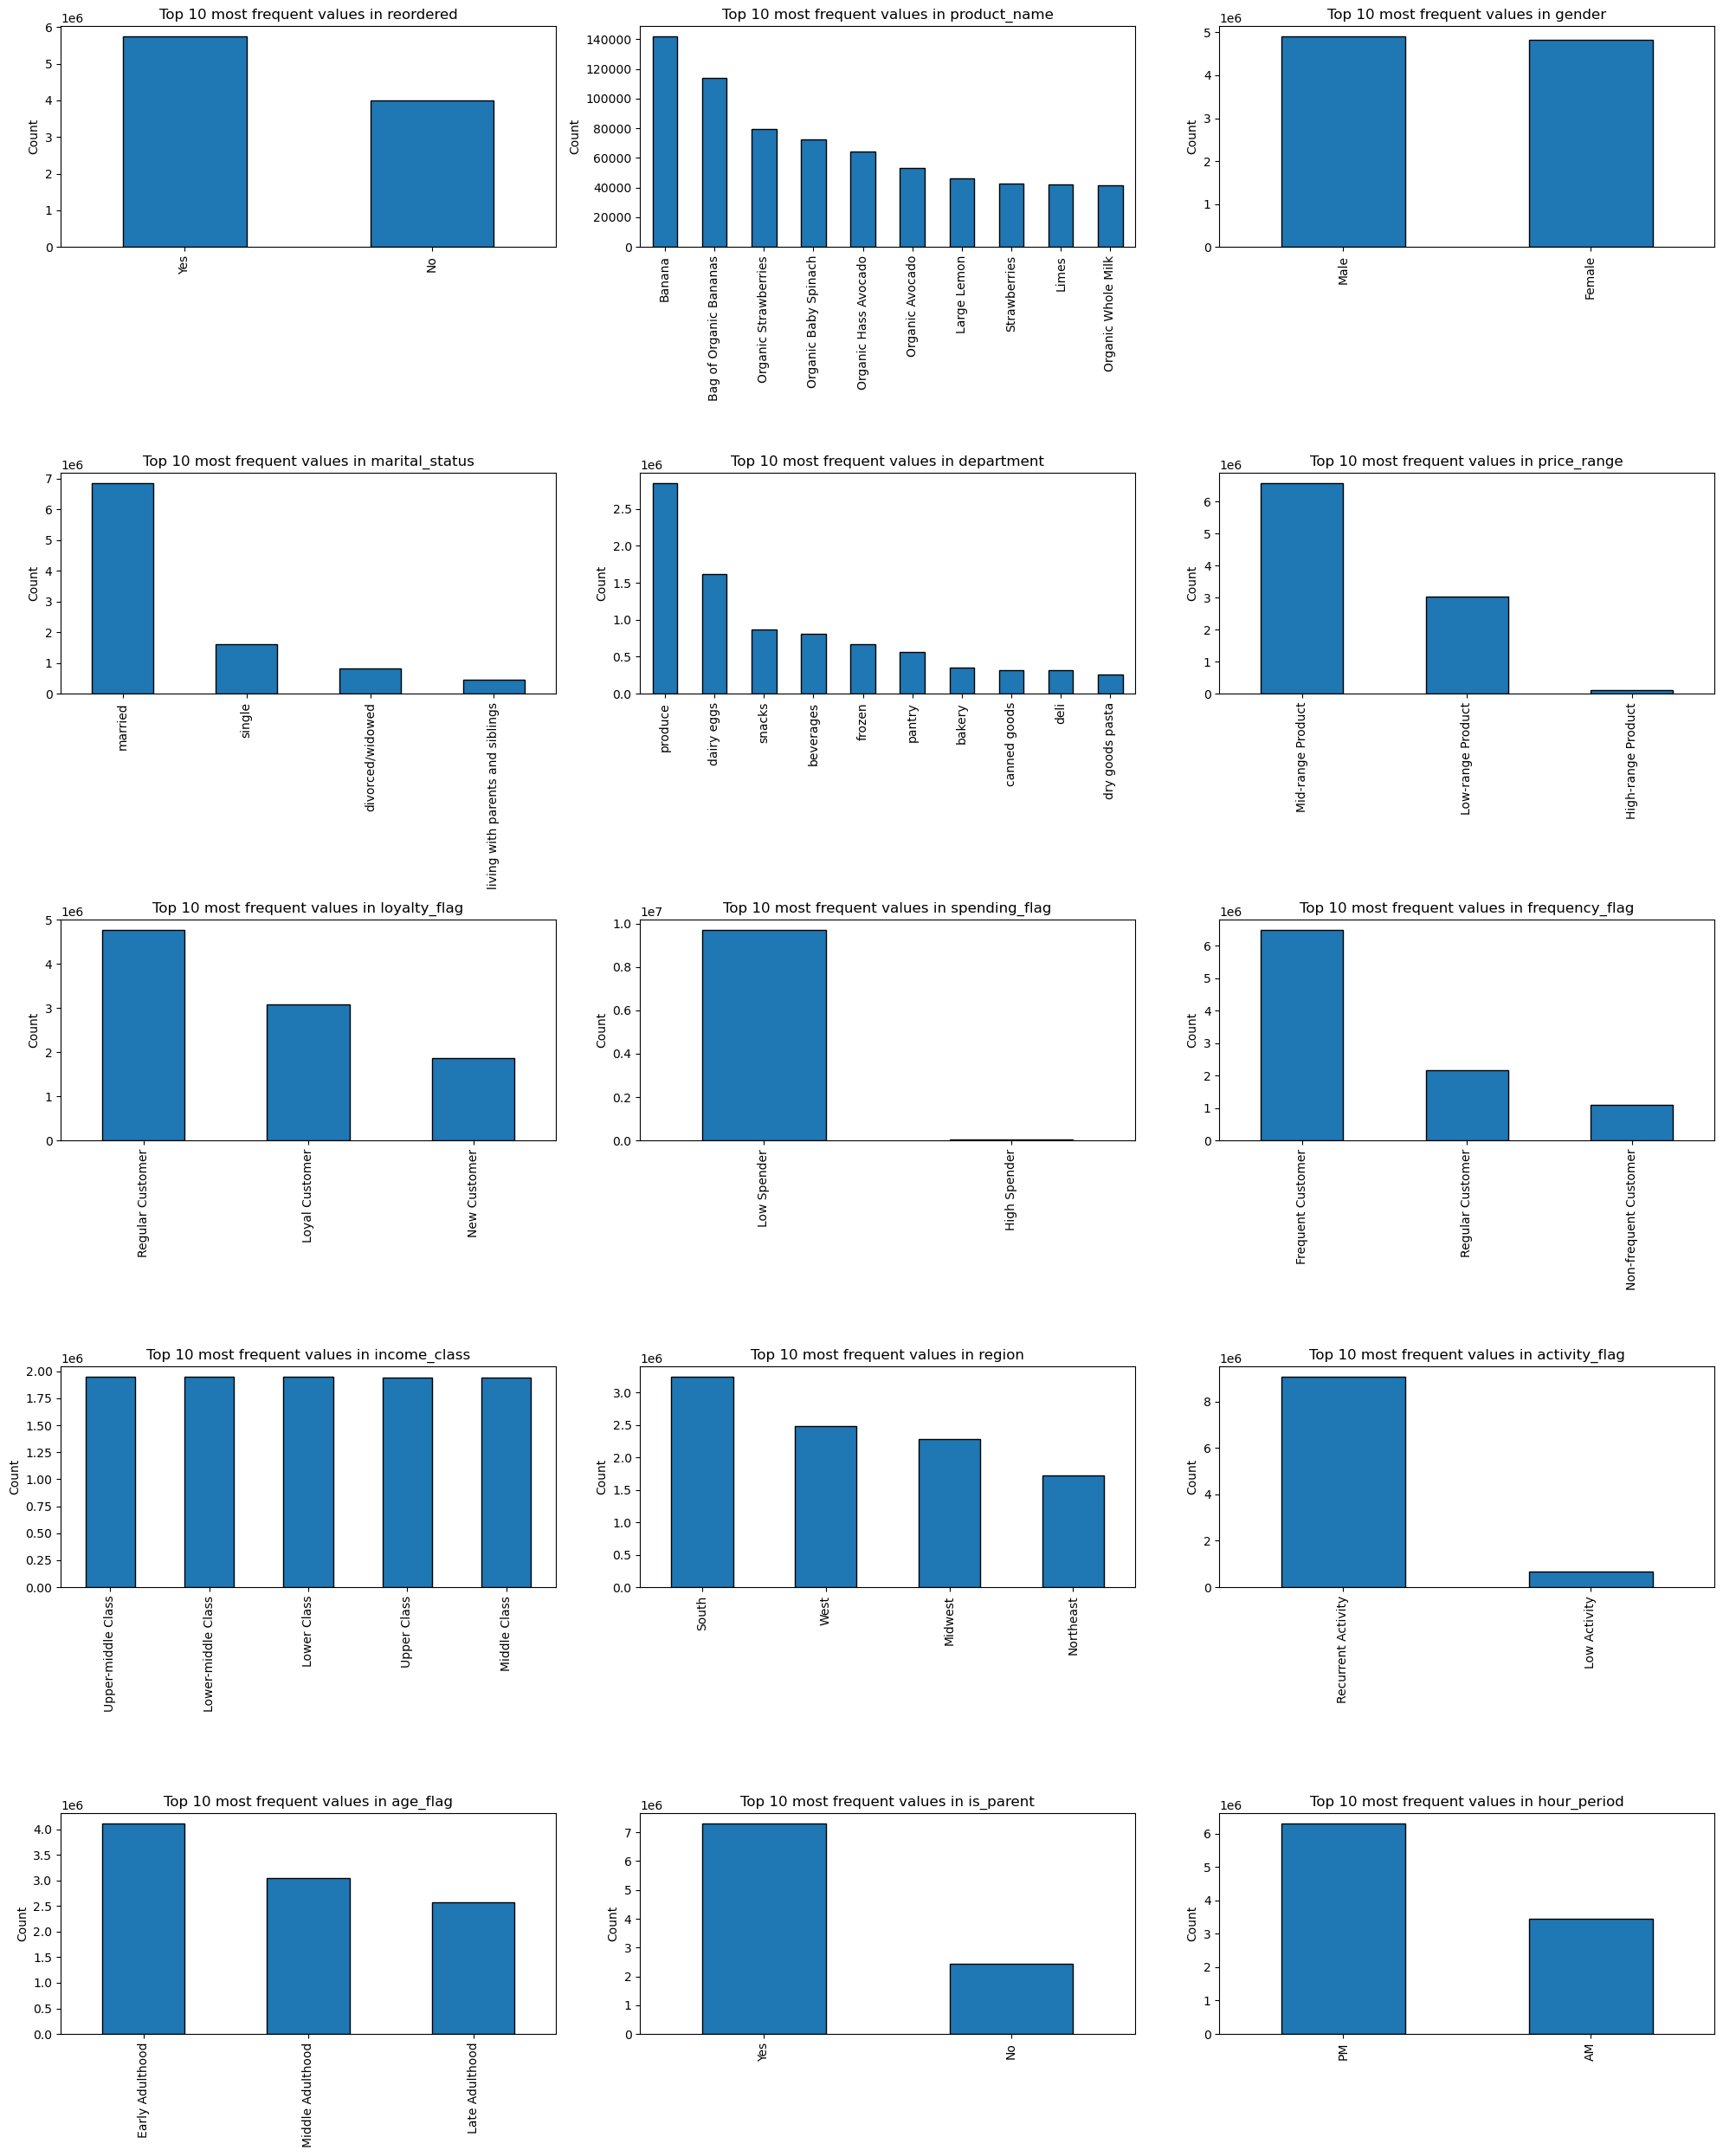

In [17]:
### Plot non-numeric columns to visualize frequency

# Select non-numeric columns and exclude specific columns
excluded_columns = ['aisle_id', 'department_id', 'date_joined', 'product_id', 'order_id', 'user_id', 'state']
non_numeric_cols_freq = small_df.select_dtypes(exclude=['float64', 'int64']).columns
non_numeric_cols_freq = [col for col in non_numeric_cols if col not in excluded_columns]

# Set the number of top values to plot
top_n = 10

# Set the number of columns in the plot grid
num_columns = 3
num_rows = (len(non_numeric_cols_freq) + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Plot bar plots for all non-numeric columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))

for i, col in enumerate(non_numeric_cols_freq):
    ax = axes[i // num_columns, i % num_columns]
    small_df[col].value_counts().nlargest(top_n).plot(kind='bar', edgecolor='k', ax=ax)
    ax.set_title(f'Top {top_n} most frequent values in {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Remove empty subplots
for j in range(i + 1, num_rows * num_columns):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# ORDERS & CUSTOMER BEHAVIOR

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_39521/1122219014.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  dist_orders_week.set_xticklabels([f'{int(x)}%' for x in x_labels])


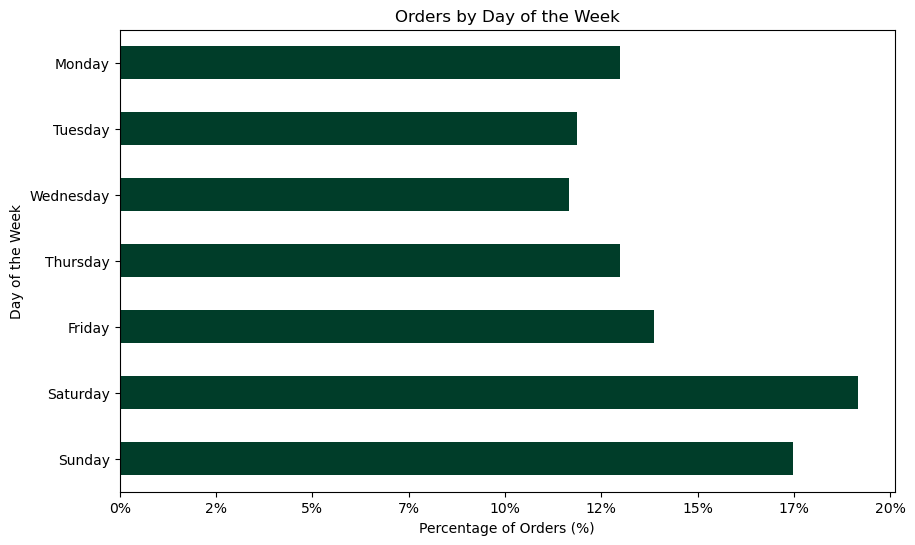

In [18]:
# Store frequency counts in a DataFrame
order_dow_counts = small_df['order_dow'].value_counts(normalize=True).sort_index() * 100  # Normalize to get percentages

# Reordering data to match Sunday at the top and Monday at the bottom
ordered_days = [1, 0, 6, 5, 4, 3, 2]
order_dow_counts = order_dow_counts.reindex(ordered_days)
days_labels = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# Plotting
dist_orders_week = order_dow_counts.plot(kind='barh', figsize=(10, 6), color='#003D29')
dist_orders_week.set_ylabel('Day of the Week')
dist_orders_week.set_xlabel('Percentage of Orders (%)')
dist_orders_week.set_title('Orders by Day of the Week')
dist_orders_week.set_yticklabels(days_labels)

# Adding x-axis tick labels in percentages
x_labels = dist_orders_week.get_xticks()
dist_orders_week.set_xticklabels([f'{int(x)}%' for x in x_labels])

plt.show()

In [19]:
# export chart
dist_orders_week.figure.savefig(os.path.join(path, '04 Analysis', 'orders_week.png'), bbox_inches = 'tight')

- **Weekends (especially Saturdays) are the busiest days for orders**, suggesting higher shopping activity and demand.
- **Tuesday to Thursday are the slowest days for orders**, indicating potential opportunities for targeted promotions and ad scheduling to drive more traffic during these times.

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_39521/2704009056.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  dist_orders_hour.set_yticklabels([f'{int(y)}%' for y in y_labels])


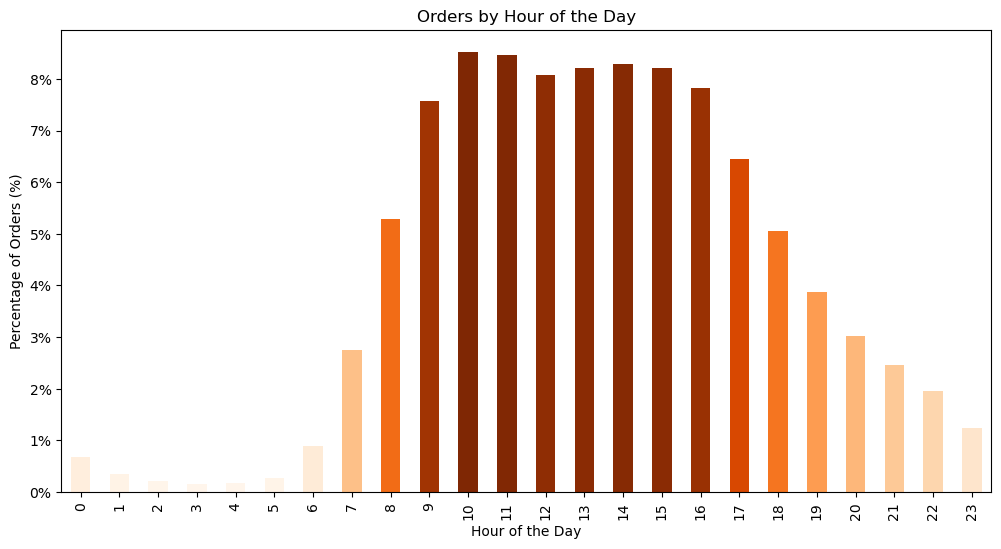

In [20]:
# Store frequency counts in a DataFrame
order_hour_counts = small_df['order_hour_of_day'].value_counts().sort_index()

# Normalize to get percentages
order_hour_counts_percentage = order_hour_counts / order_hour_counts.sum() * 100

# Create a gradient color scheme based on the order counts
norm = mcolors.Normalize(vmin=order_hour_counts_percentage.min(), vmax=order_hour_counts_percentage.max())
colors = plt.cm.Oranges(norm(order_hour_counts_percentage.values))

# Plotting
dist_orders_hour = order_hour_counts_percentage.plot(kind='bar', color=colors, figsize=(12, 6))
dist_orders_hour.set_xlabel('Hour of the Day')
dist_orders_hour.set_ylabel('Percentage of Orders (%)')
dist_orders_hour.set_title('Orders by Hour of the Day')

# Adding y-axis tick labels in percentages
y_labels = dist_orders_hour.get_yticks()
dist_orders_hour.set_yticklabels([f'{int(y)}%' for y in y_labels])

plt.show()

- **The peak ordering times are from 10 AM to 4 PM**, making these hours the busiest for customer activity.
- **Early mornings (midnight to 6 AM) and late evenings (8 PM to midnight) have the fewest orders**, indicating low customer activity during these times.

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_39521/2515987493.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  dist_rev_hour.set_yticklabels([f'${int(y):,}' for y in y_labels])


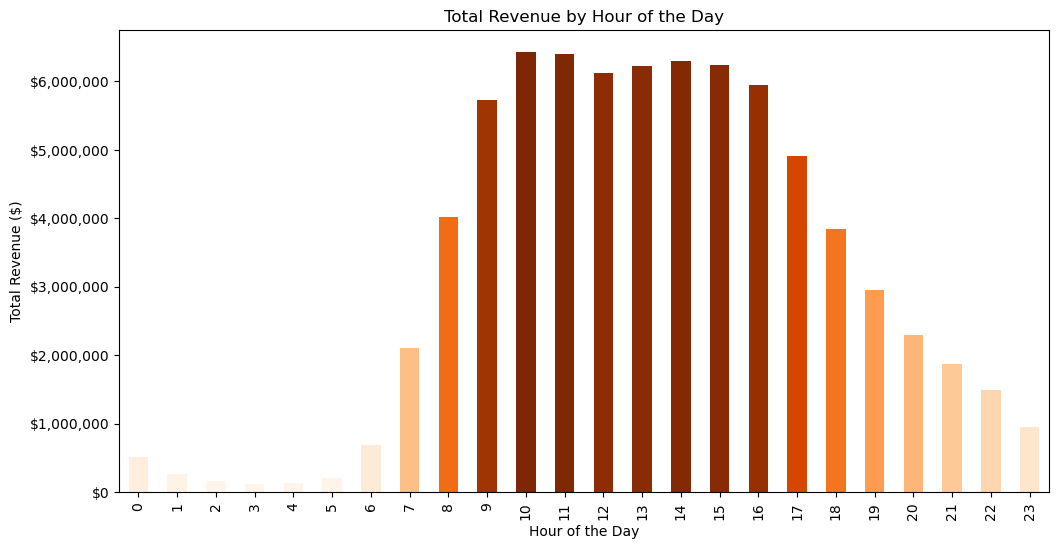

In [21]:
# Aggregate total revenue by hour of day
revenue_hourly = small_df.groupby('order_hour_of_day')['prices'].sum()

# Create a gradient color scheme based on the revenue counts
norm = mcolors.Normalize(vmin=revenue_hourly.min(), vmax=revenue_hourly.max())
colors = plt.cm.Oranges(norm(revenue_hourly.values))

# Plotting
dist_rev_hour = revenue_hourly.plot(kind='bar', color=colors, figsize=(12, 6))
dist_rev_hour.set_xlabel('Hour of the Day')
dist_rev_hour.set_ylabel('Total Revenue ($)')
dist_rev_hour.set_title('Total Revenue by Hour of the Day')

# Adding y-axis tick labels in dollars
y_labels = dist_rev_hour.get_yticks()
dist_rev_hour.set_yticklabels([f'${int(y):,}' for y in y_labels])

plt.show()

The alignment between order volume and revenue indicates stable average spending per order throughout the day, with both metrics peaking from 10 AM to 4 PM and dipping during early mornings and late evenings.

In [22]:
# 'frequency_flag' column frequency counts
small_df['price_range'].value_counts()

Mid-range Product     6568774
Low-range Product     3036930
High-range Product     123682
Name: price_range, dtype: int64

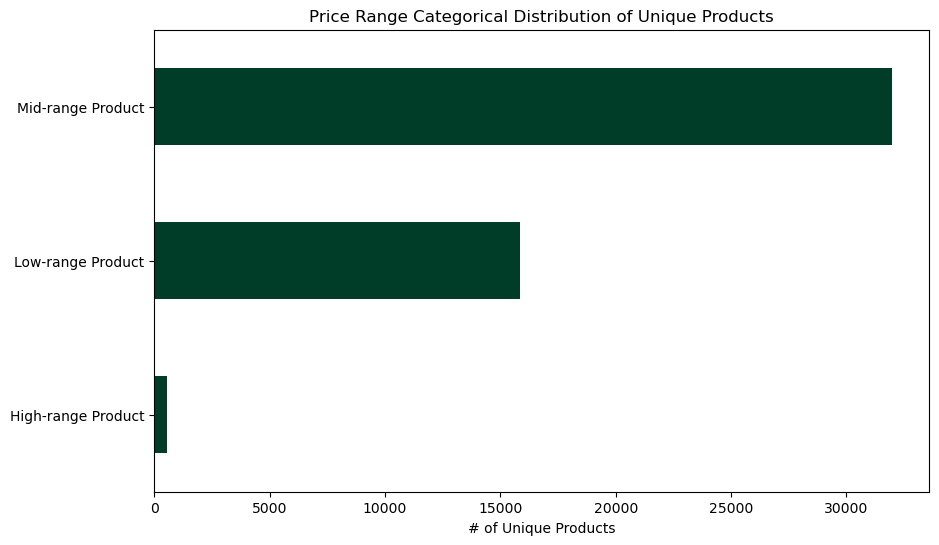

In [23]:
# Filter to get only unique products based on 'product_id'
unique_products = small_df.drop_duplicates(subset='product_id')

# Count the occurrences of each 'price_range' category for unique products
price_range_counts = unique_products['price_range'].value_counts().sort_values()

# Plotting
bar_unique_price_range = price_range_counts.plot(kind='barh', figsize=(10, 6), color='#003D29')
plt.title('Price Range Categorical Distribution of Unique Products')
plt.xlabel('# of Unique Products')

plt.show()

In [24]:
# export chart
bar_unique_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'price_range.png'), bbox_inches = 'tight')

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_39521/3718172106.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  dist_orders_dept.set_xticklabels([f'{int(x)}%' for x in x_labels])


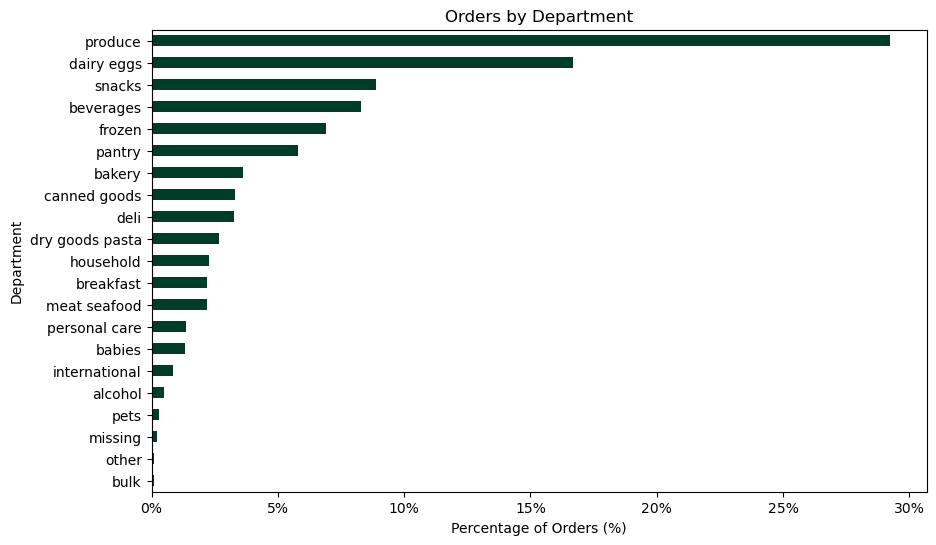

In [25]:
# Store frequency counts in a DataFrame and sort by orders in ascending order
department_counts = small_df['department'].value_counts(normalize=True).sort_values() * 100  # Normalize to get percentages

# Plotting
dist_orders_dept = department_counts.plot(kind='barh', figsize=(10, 6), color='#003D29')
dist_orders_dept.set_ylabel('Department')
dist_orders_dept.set_xlabel('Percentage of Orders (%)')
dist_orders_dept.set_title('Orders by Department')

# Adding x-axis tick labels in percentages
x_labels = dist_orders_dept.get_xticks()
dist_orders_dept.set_xticklabels([f'{int(x)}%' for x in x_labels])

plt.show()

In [26]:
# export chart
dist_orders_dept.figure.savefig(os.path.join(path, '04 Analysis', 'orders_dept.png'), bbox_inches = 'tight')

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_39521/2468880148.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  dist_cust_loyalty.set_xticklabels([f'{int(x)}%' for x in x_labels])


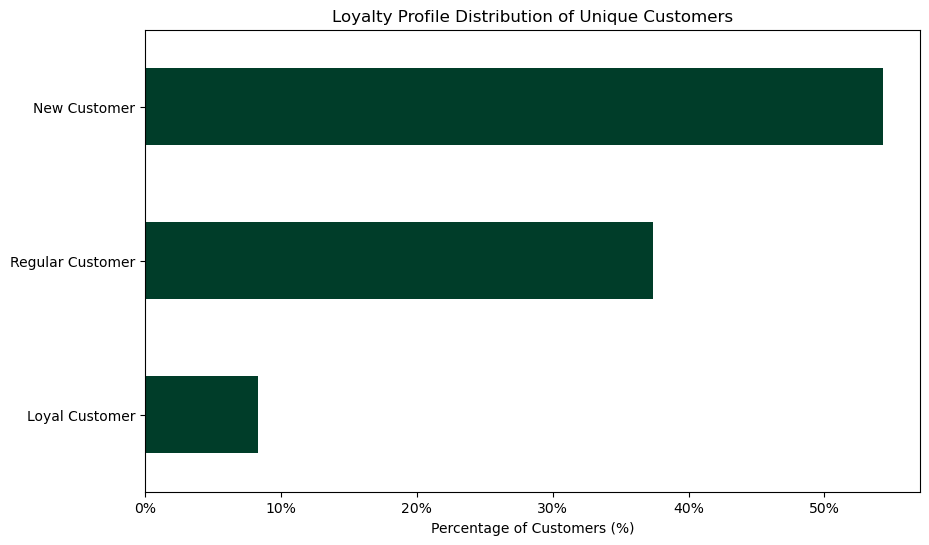

In [27]:
# Filter to get only unique customers based on 'user_id'
unique_customers = small_df.drop_duplicates(subset='user_id')

# Calculate the percentage of each 'loyalty_flag' category for unique customers
loyalty_flag_counts = unique_customers['loyalty_flag'].value_counts(normalize=True).sort_values() * 100

# Plotting
dist_cust_loyalty = loyalty_flag_counts.plot(kind='barh', figsize=(10, 6), color='#003D29')
plt.title('Loyalty Profile Distribution of Unique Customers')
plt.xlabel('Percentage of Customers (%)')

# Format x-axis tick labels as percentages
x_labels = dist_cust_loyalty.get_xticks()
dist_cust_loyalty.set_xticklabels([f'{int(x)}%' for x in x_labels])

plt.show()

In [28]:
# export chart
dist_cust_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'cust_loyalty.png'), bbox_inches = 'tight')

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_39521/1495438822.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  dist_cust_freq.set_xticklabels([f'{int(x)}%' for x in x_labels])


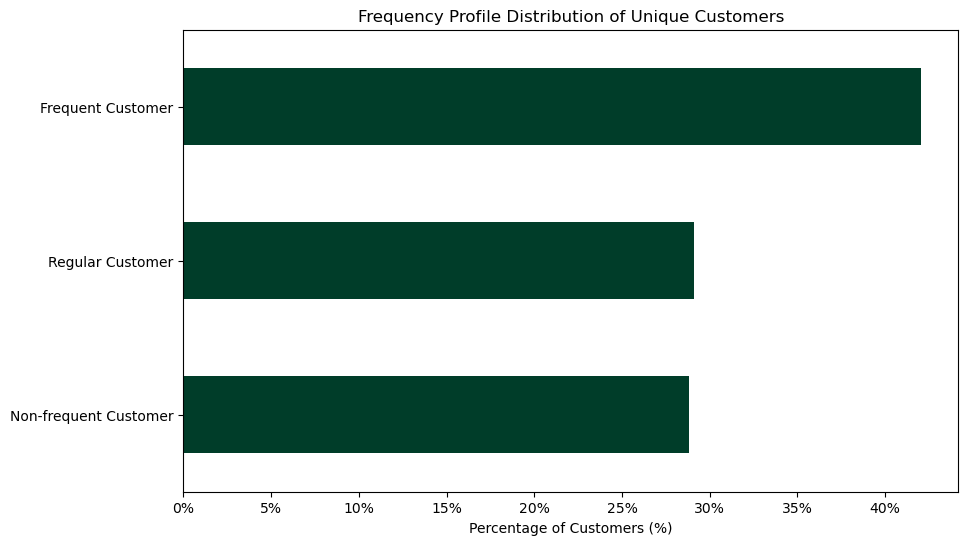

In [29]:
# Filter to get only unique customers based on 'user_id'
unique_customers = small_df.drop_duplicates(subset='user_id')

# Calculate the percentage of each 'frequency_flag' category for unique customers
frequency_flag_counts = unique_customers['frequency_flag'].value_counts(normalize=True).sort_values() * 100

# Plotting
dist_cust_freq = frequency_flag_counts.plot(kind='barh', figsize=(10, 6), color='#003D29')
plt.title('Frequency Profile Distribution of Unique Customers')
plt.xlabel('Percentage of Customers (%)')

# Format x-axis tick labels as percentages
x_labels = dist_cust_freq.get_xticks()
dist_cust_freq.set_xticklabels([f'{int(x)}%' for x in x_labels])

plt.show()

In [30]:
# export chart
dist_cust_freq.figure.savefig(os.path.join(path, '04 Analysis', 'cust_frequency.png'), bbox_inches = 'tight')

In [31]:
# Define custom color palette
custom_colors = ['#003D29', '#FF7009', '#EFD1A9', '#BA0239', '#ECAA01']

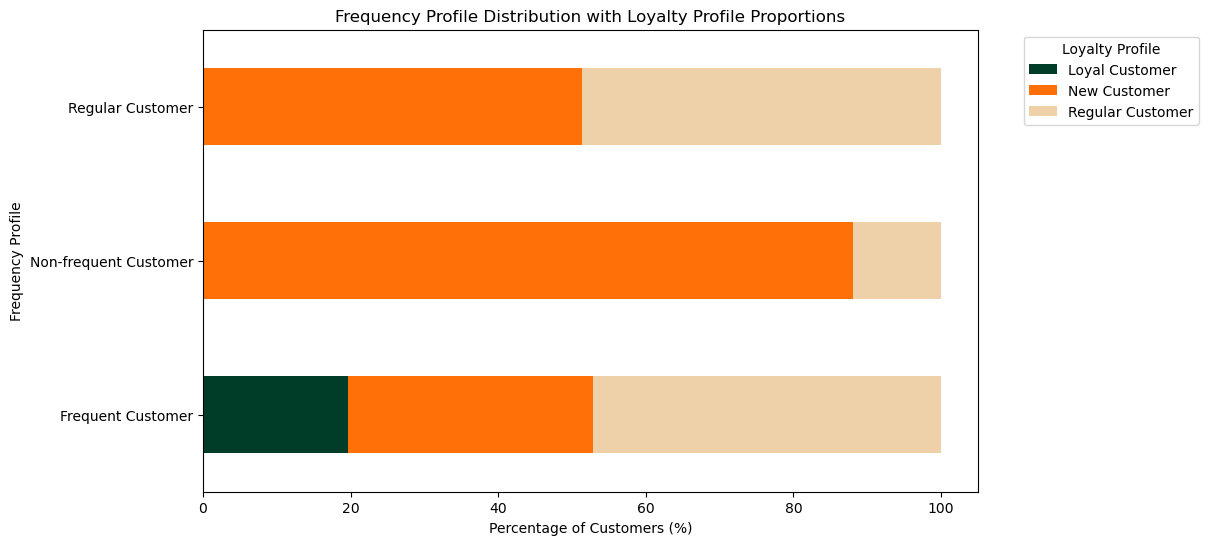

In [32]:
# Filter to get only unique customers based on 'user_id'
unique_customers = small_df.drop_duplicates(subset='user_id')

# Create a crosstab to get the counts of 'loyalty_flag' within each 'frequency_flag'
crosstab = pd.crosstab(unique_customers['frequency_flag'], unique_customers['loyalty_flag'], normalize='index') * 100

# Plotting
cust_freq_loyalty = crosstab.plot(kind='barh', stacked=True, figsize=(10, 6), color=custom_colors)
plt.title('Frequency Profile Distribution with Loyalty Profile Proportions')
plt.xlabel('Percentage of Customers (%)')
plt.ylabel('Frequency Profile')
plt.legend(title='Loyalty Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [33]:
# export chart
cust_freq_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'cust_freq_loyalty.png'), bbox_inches = 'tight')

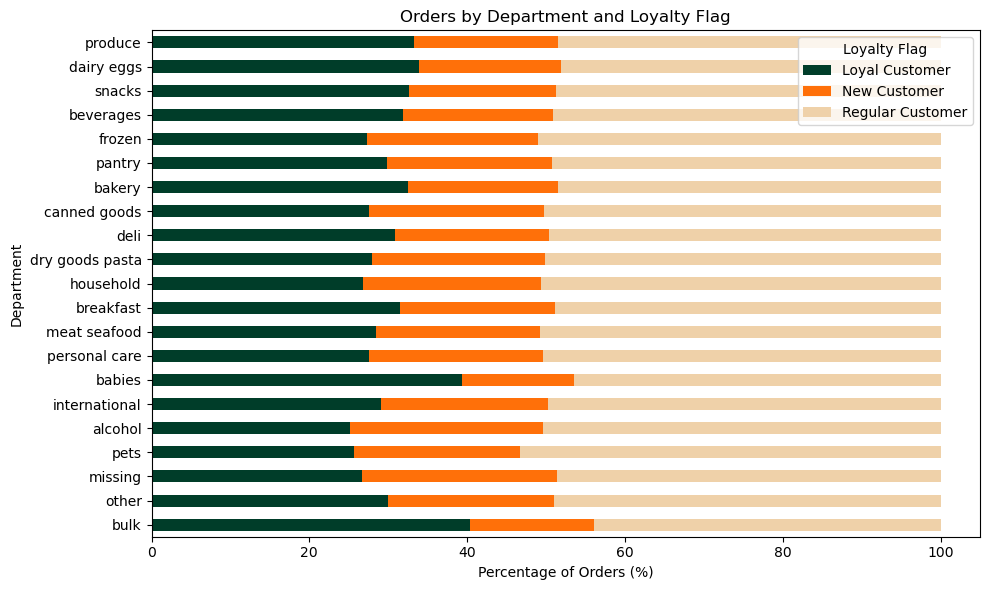

In [34]:
# Pivot table for 'order_dow' by 'loyalty_flag'
pivot_dept_loyalty = pd.pivot_table(small_df, values='order_id', index='department', columns='loyalty_flag', aggfunc='count', fill_value=0)

# Calculate total counts across 'loyalty_flag'
pivot_dept_loyalty['total'] = pivot_dept_loyalty.sum(axis=1)

# Sort the DataFrame by the total counts in ascending order
pivot_dept_loyalty_sorted = pivot_dept_loyalty.sort_values(by='total').drop(columns='total')

# Normalize to get percentages
pivot_dept_loyalty_normalized = pivot_dept_loyalty_sorted.div(pivot_dept_loyalty_sorted.sum(axis=1), axis=0) * 100

# Plotting
orders_dept_loyalty = pivot_dept_loyalty_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=custom_colors)
plt.title('Orders by Department and Loyalty Flag')
plt.xlabel('Percentage of Orders (%)')
plt.ylabel('Department')
plt.legend(title='Loyalty Flag')
plt.tight_layout()
plt.show()

**Regular Customers dominate orders across most departments**, highlighting their broad engagement with various product categories. Loyal Customers show significant activity in babies and bulk departments, indicating opportunities for targeted marketing strategies for this segment of customers.

In [35]:
# export chart
orders_dept_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'orders_dept_loyalty.png'), bbox_inches = 'tight')

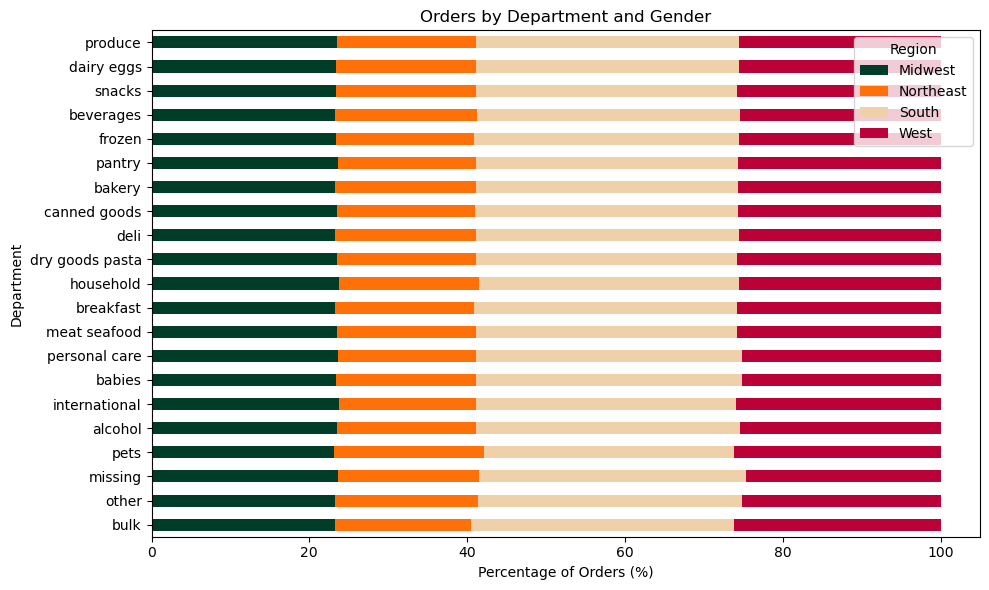

In [36]:
# Pivot table for 'order_dow' by 'region'
pivot_dept_region = pd.pivot_table(small_df, values='order_id', index='department', columns='region', aggfunc='count', fill_value=0)

# Calculate total counts across regions
pivot_dept_region['total'] = pivot_dept_region.sum(axis=1)

# Sort the DataFrame by the total counts in ascending order
pivot_dept_region_sorted = pivot_dept_region.sort_values(by='total').drop(columns='total')

# Normalize to get percentages
pivot_dept_region_normalized = pivot_dept_region_sorted.div(pivot_dept_region_sorted.sum(axis=1), axis=0) * 100

# Plotting
orders_dept_region = pivot_dept_region_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=custom_colors)
plt.title('Orders by Department and Gender')
plt.xlabel('Percentage of Orders (%)')
plt.ylabel('Department')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

**The South region leads in order volume across all departments**, with no significant distinctions observed.

In [37]:
# export chart
orders_dept_region.figure.savefig(os.path.join(path, '04 Analysis', 'orders_dept_region.png'), bbox_inches = 'tight')

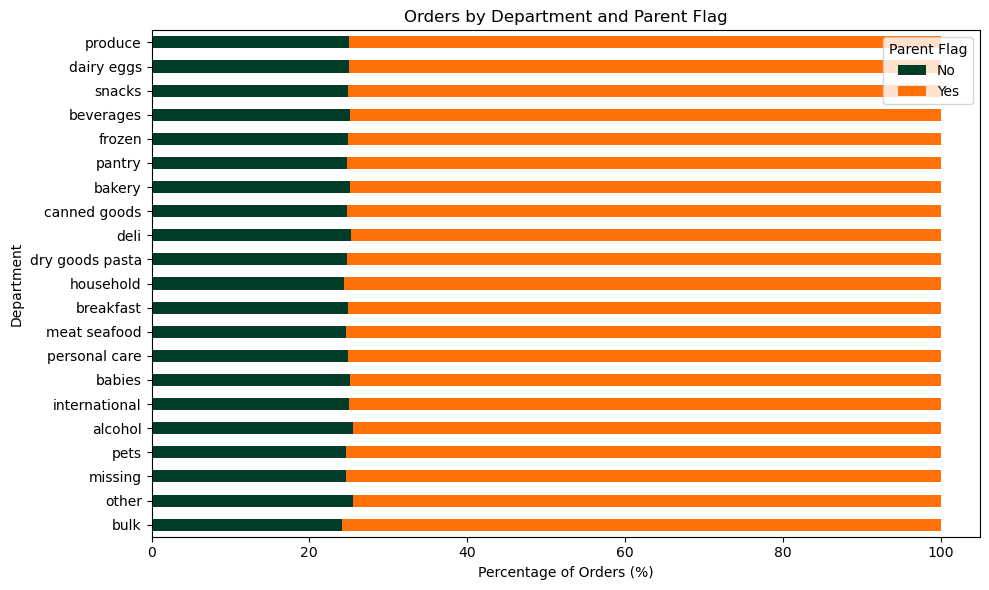

In [38]:
# Pivot table for 'department' by 'is_parent'
pivot_dept_parent= pd.pivot_table(small_df, values='order_id', index='department', columns='is_parent', aggfunc='count', fill_value=0)

# Calculate total counts across 'is_parent'
pivot_dept_parent['total'] = pivot_dept_parent.sum(axis=1)

# Sort the DataFrame by the total counts in ascending order
pivot_dept_parent_sorted = pivot_dept_parent.sort_values(by='total').drop(columns='total')

# Normalize to get percentages
pivot_dept_parent_normalized = pivot_dept_parent_sorted.div(pivot_dept_parent_sorted.sum(axis=1), axis=0) * 100

# Plotting
orders_dept_parent = pivot_dept_parent_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=custom_colors)
plt.title('Orders by Department and Parent Flag')
plt.xlabel('Percentage of Orders (%)')
plt.ylabel('Department')
plt.legend(title='Parent Flag')
plt.tight_layout()
plt.show()

**Parents dominate the order volume across all departments**, highlighting their significant role in the customer base.

In [39]:
# export chart
orders_dept_parent.figure.savefig(os.path.join(path, '04 Analysis', 'orders_dept_parent.png'), bbox_inches = 'tight')

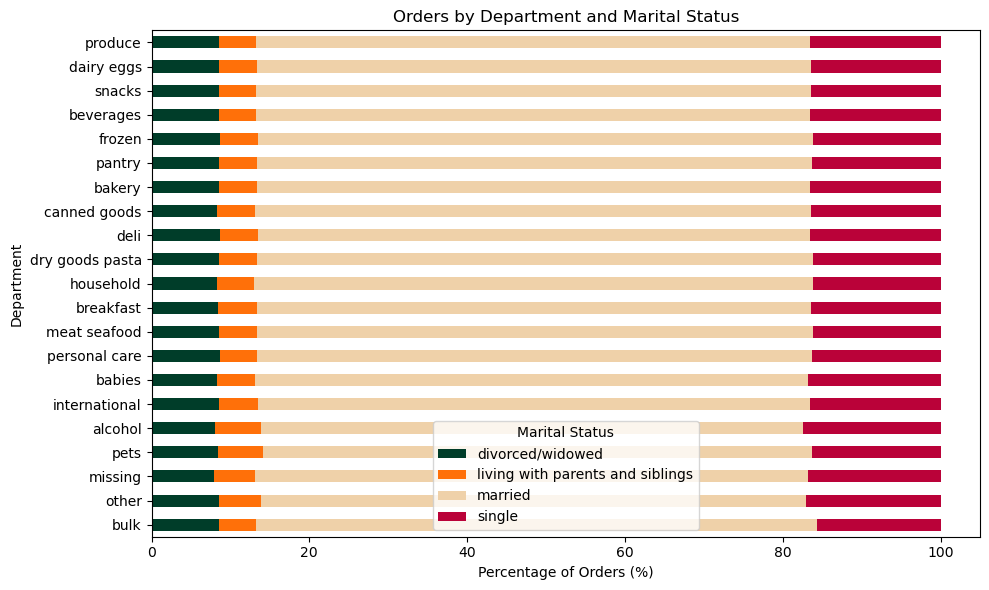

In [40]:
# Pivot table for 'department' by 'marital_status'
pivot_dept_marital= pd.pivot_table(small_df, values='order_id', index='department', columns='marital_status', aggfunc='count', fill_value=0)

# Calculate total counts across 'marital_status'
pivot_dept_marital['total'] = pivot_dept_marital.sum(axis=1)

# Sort the DataFrame by the total counts in ascending order
pivot_dept_marital_sorted = pivot_dept_marital.sort_values(by='total').drop(columns='total')

# Normalize to get percentages
pivot_dept_marital_normalized = pivot_dept_marital_sorted.div(pivot_dept_marital_sorted.sum(axis=1), axis=0) * 100

# Plotting
orders_dept_marital = pivot_dept_marital_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=custom_colors)
plt.title('Orders by Department and Marital Status')
plt.xlabel('Percentage of Orders (%)')
plt.ylabel('Department')
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

- **Married individuals place the highest percentage of orders across all departments**, making them the primary customer segment.

- **Single customers also show significant engagement**, suggesting opportunities for targeted marketing to this segment as well.

In [41]:
# export chart
orders_dept_marital.figure.savefig(os.path.join(path, '04 Analysis', 'orders_dept_marital.png'), bbox_inches = 'tight')

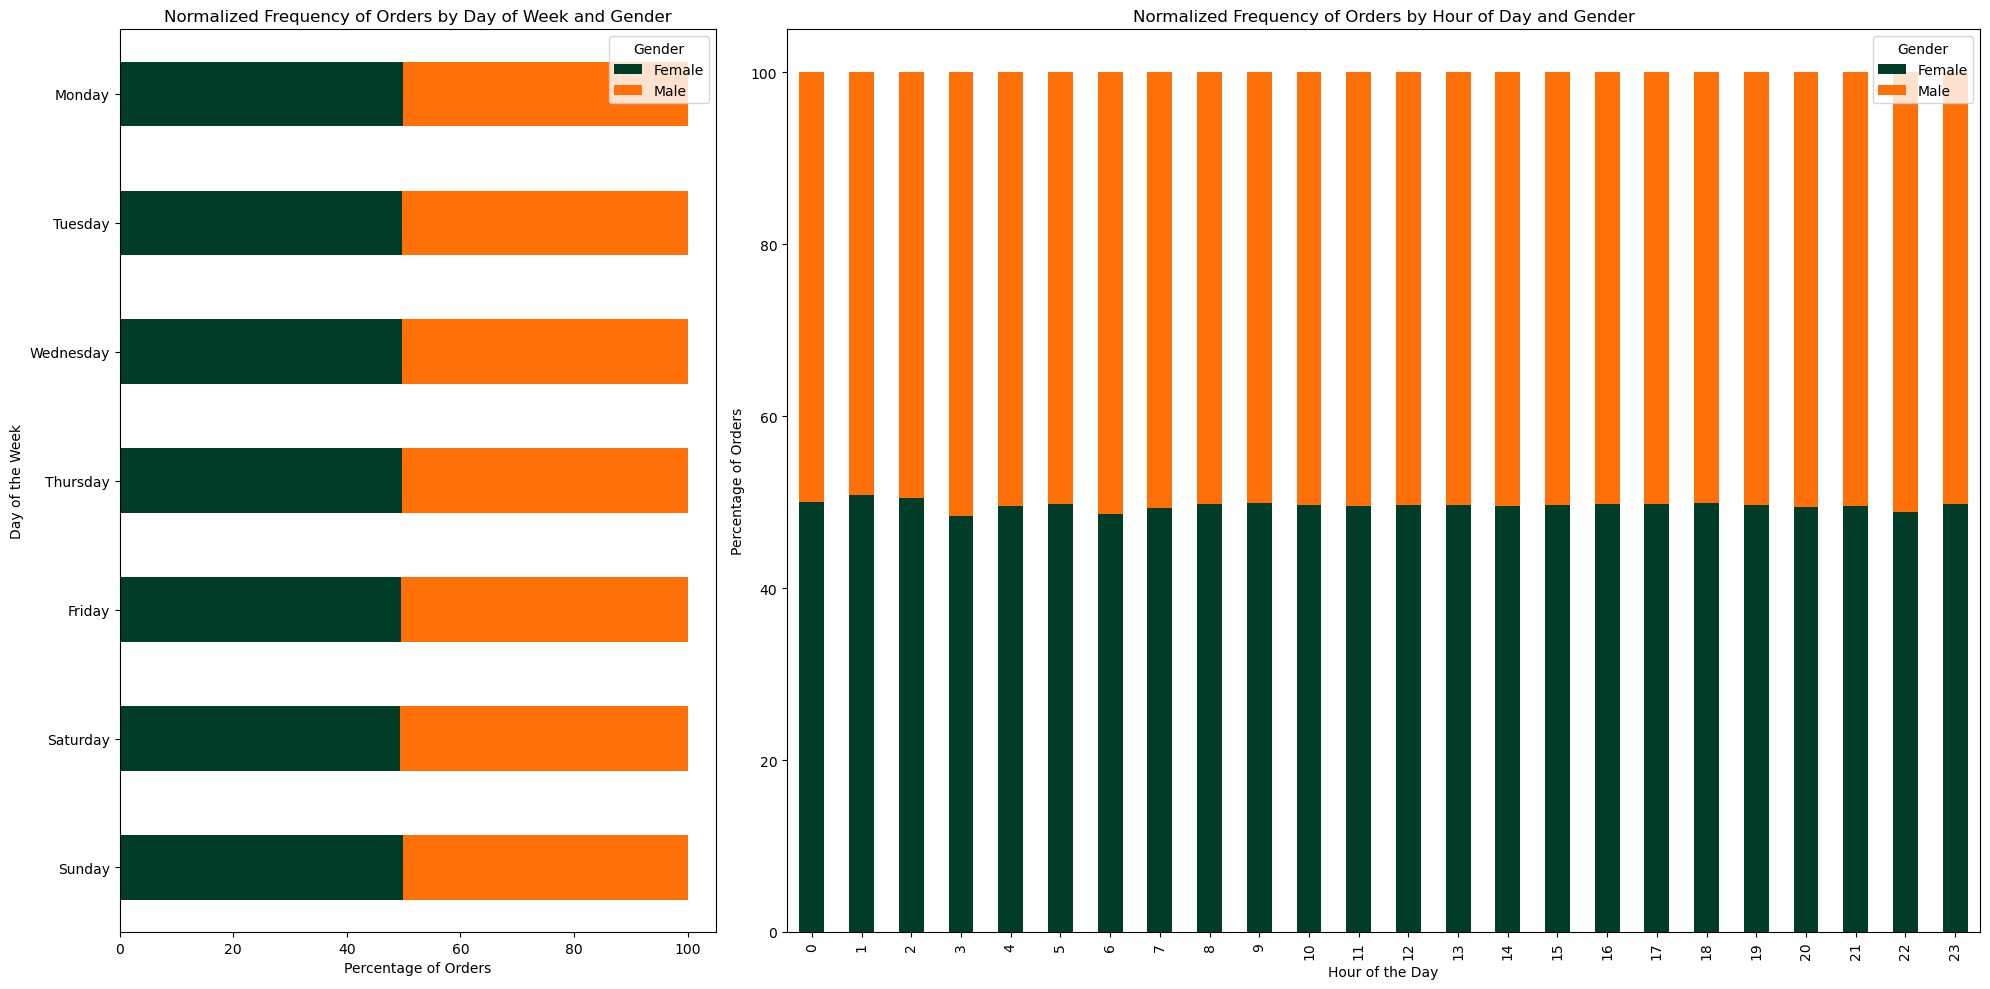

In [42]:
# Pivot table for 'order_dow' by 'gender'
pivot_dow_gender = pd.pivot_table(small_df, values='order_id', index='order_dow', columns='gender', aggfunc='count', fill_value=0)

# Pivot table for 'order_hour_of_day' by 'gender'
pivot_hour_gender = pd.pivot_table(small_df, values='order_id', index='order_hour_of_day', columns='gender', aggfunc='count', fill_value=0)

# Normalize the pivot tables by row totals
pivot_dow_gender_normalized = pivot_dow_gender.div(pivot_dow_gender.sum(axis=1), axis=0) * 100
pivot_hour_gender_normalized = pivot_hour_gender.div(pivot_hour_gender.sum(axis=1), axis=0) * 100

# Reorder the index for 'order_dow' to match the desired order and then invert the sorting
ordered_days = [1, 0, 6, 5, 4, 3, 2]  # Sunday to Monday with 0 as Saturday
pivot_dow_gender_normalized = pivot_dow_gender_normalized.reindex(ordered_days)

# Create a figure with gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Plot 'order_dow' by 'gender' as a horizontal bar chart with inverted sorting
ax0 = plt.subplot(gs[0])
pivot_dow_gender_normalized.plot(kind='barh', stacked=True, ax=ax0, color=custom_colors)
ax0.set_title('Normalized Frequency of Orders by Day of Week and Gender')
ax0.set_xlabel('Percentage of Orders')
ax0.set_ylabel('Day of the Week')
ax0.set_yticklabels(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'])
ax0.legend(title='Gender')

# Plot 'order_hour_of_day' by 'gender' and 'customer_segment'
ax1 = plt.subplot(gs[1])
pivot_hour_gender_normalized.plot(kind='bar', stacked=True, ax=ax1, color=custom_colors)
ax1.set_title('Normalized Frequency of Orders by Hour of Day and Gender')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Percentage of Orders')
ax1.legend(title='Gender')

plt.tight_layout()
plt.show()

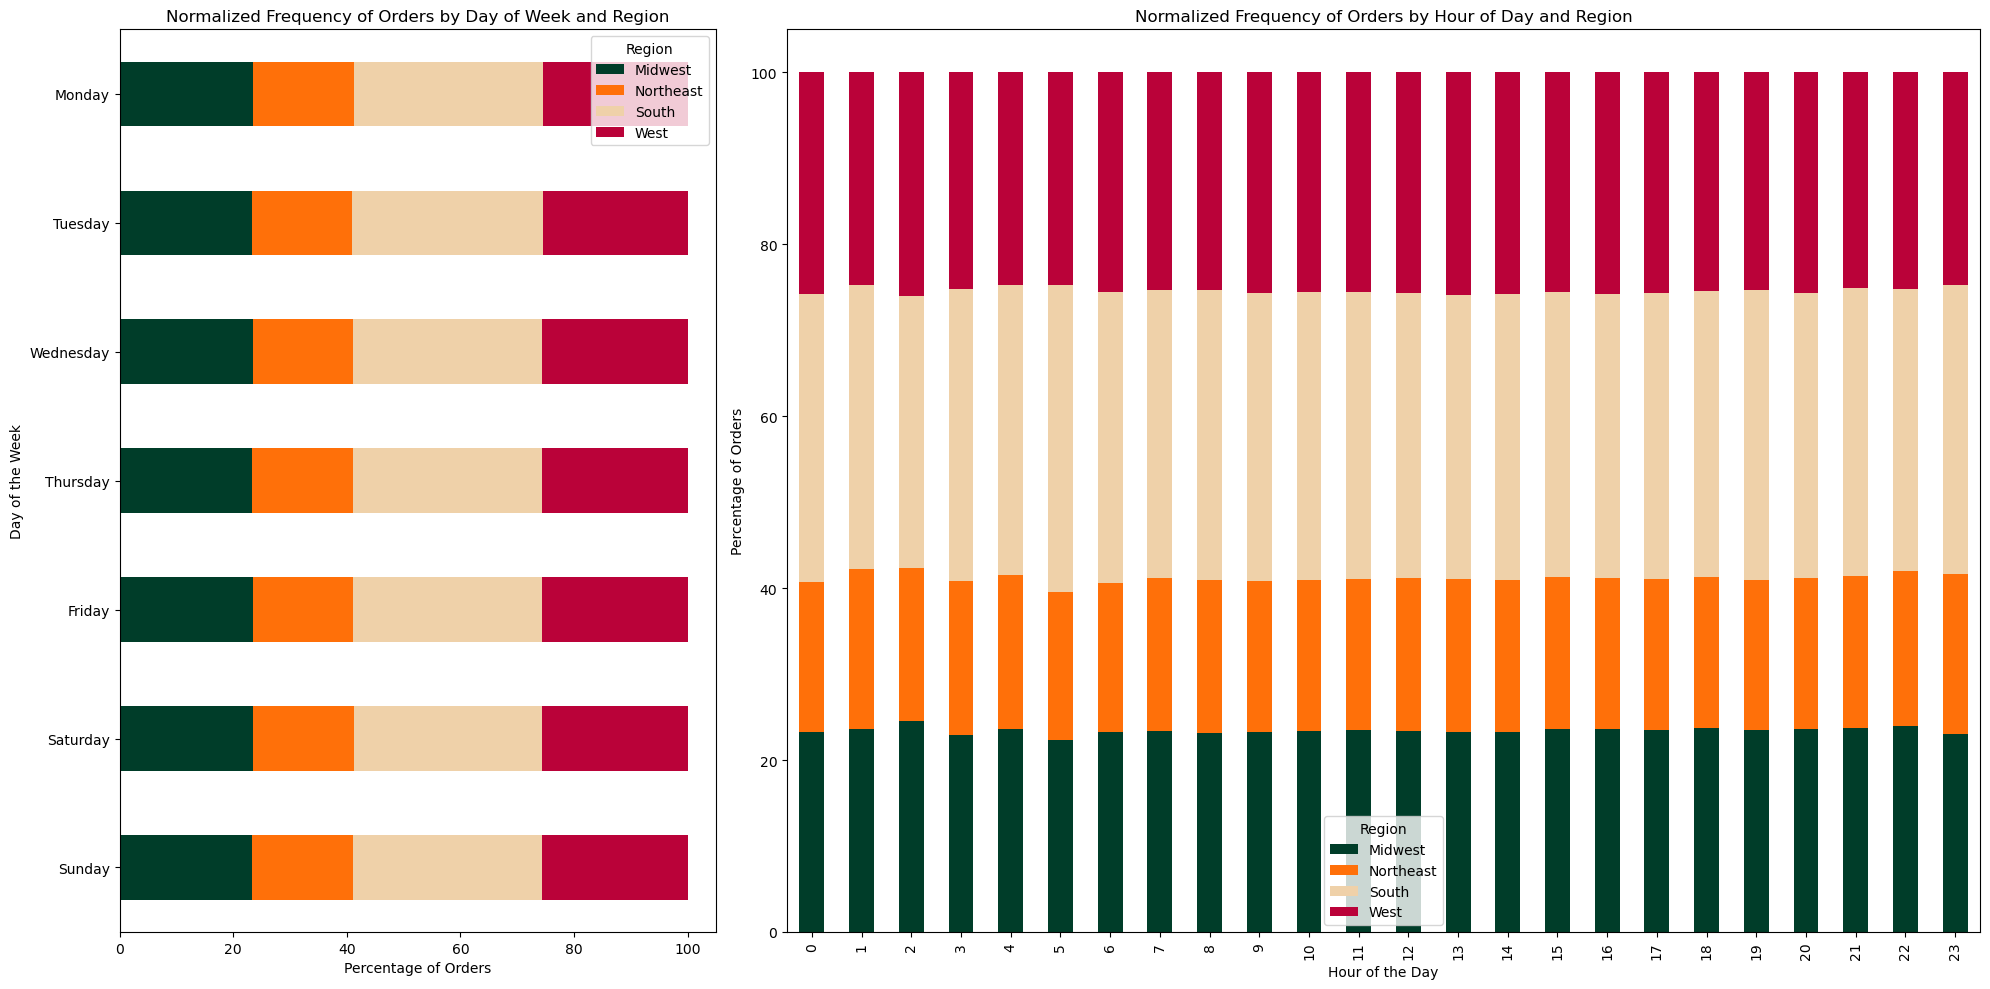

In [43]:
# Pivot table for 'order_dow' by 'region'
pivot_dow_region = pd.pivot_table(small_df, values='order_id', index='order_dow', columns='region', aggfunc='count', fill_value=0)

# Pivot table for 'order_hour_of_day' by 'region'
pivot_hour_region = pd.pivot_table(small_df, values='order_id', index='order_hour_of_day', columns='region', aggfunc='count', fill_value=0)

# Normalize the pivot tables
pivot_dow_region_normalized = pivot_dow_region.div(pivot_dow_region.sum(axis=1), axis=0) * 100
pivot_hour_region_normalized = pivot_hour_region.div(pivot_hour_region.sum(axis=1), axis=0) * 100

# Reorder the index for 'order_dow' to match the desired order and then invert the sorting
ordered_days = [1, 0, 6, 5, 4, 3, 2]  # Sunday to Monday with 0 as Saturday
pivot_dow_region_normalized = pivot_dow_region_normalized.reindex(ordered_days)

# Create a figure with gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Plot 'order_dow' by 'region' as a horizontal bar chart with inverted sorting
ax0 = plt.subplot(gs[0])
pivot_dow_region_normalized.plot(kind='barh', stacked=True, ax=ax0, color=custom_colors)
ax0.set_title('Normalized Frequency of Orders by Day of Week and Region')
ax0.set_xlabel('Percentage of Orders')
ax0.set_ylabel('Day of the Week')
ax0.set_yticklabels(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'])
ax0.legend(title='Region')

# Plot 'order_hour_of_day' by 'region' and 'customer_segment'
ax1 = plt.subplot(gs[1])
pivot_hour_region_normalized.plot(kind='bar', stacked=True, ax=ax1, color=custom_colors)
ax1.set_title('Normalized Frequency of Orders by Hour of Day and Region')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Percentage of Orders')
ax1.legend(title='Region')

plt.tight_layout()
plt.show()

- **The South and West regions consistently have the highest order volumes across all days and hours**, indicating strong customer bases in these regions.

- **Order distribution by region remains stable throughout the week and day**, with the South leading, followed by the West, Midwest, and Northeast.

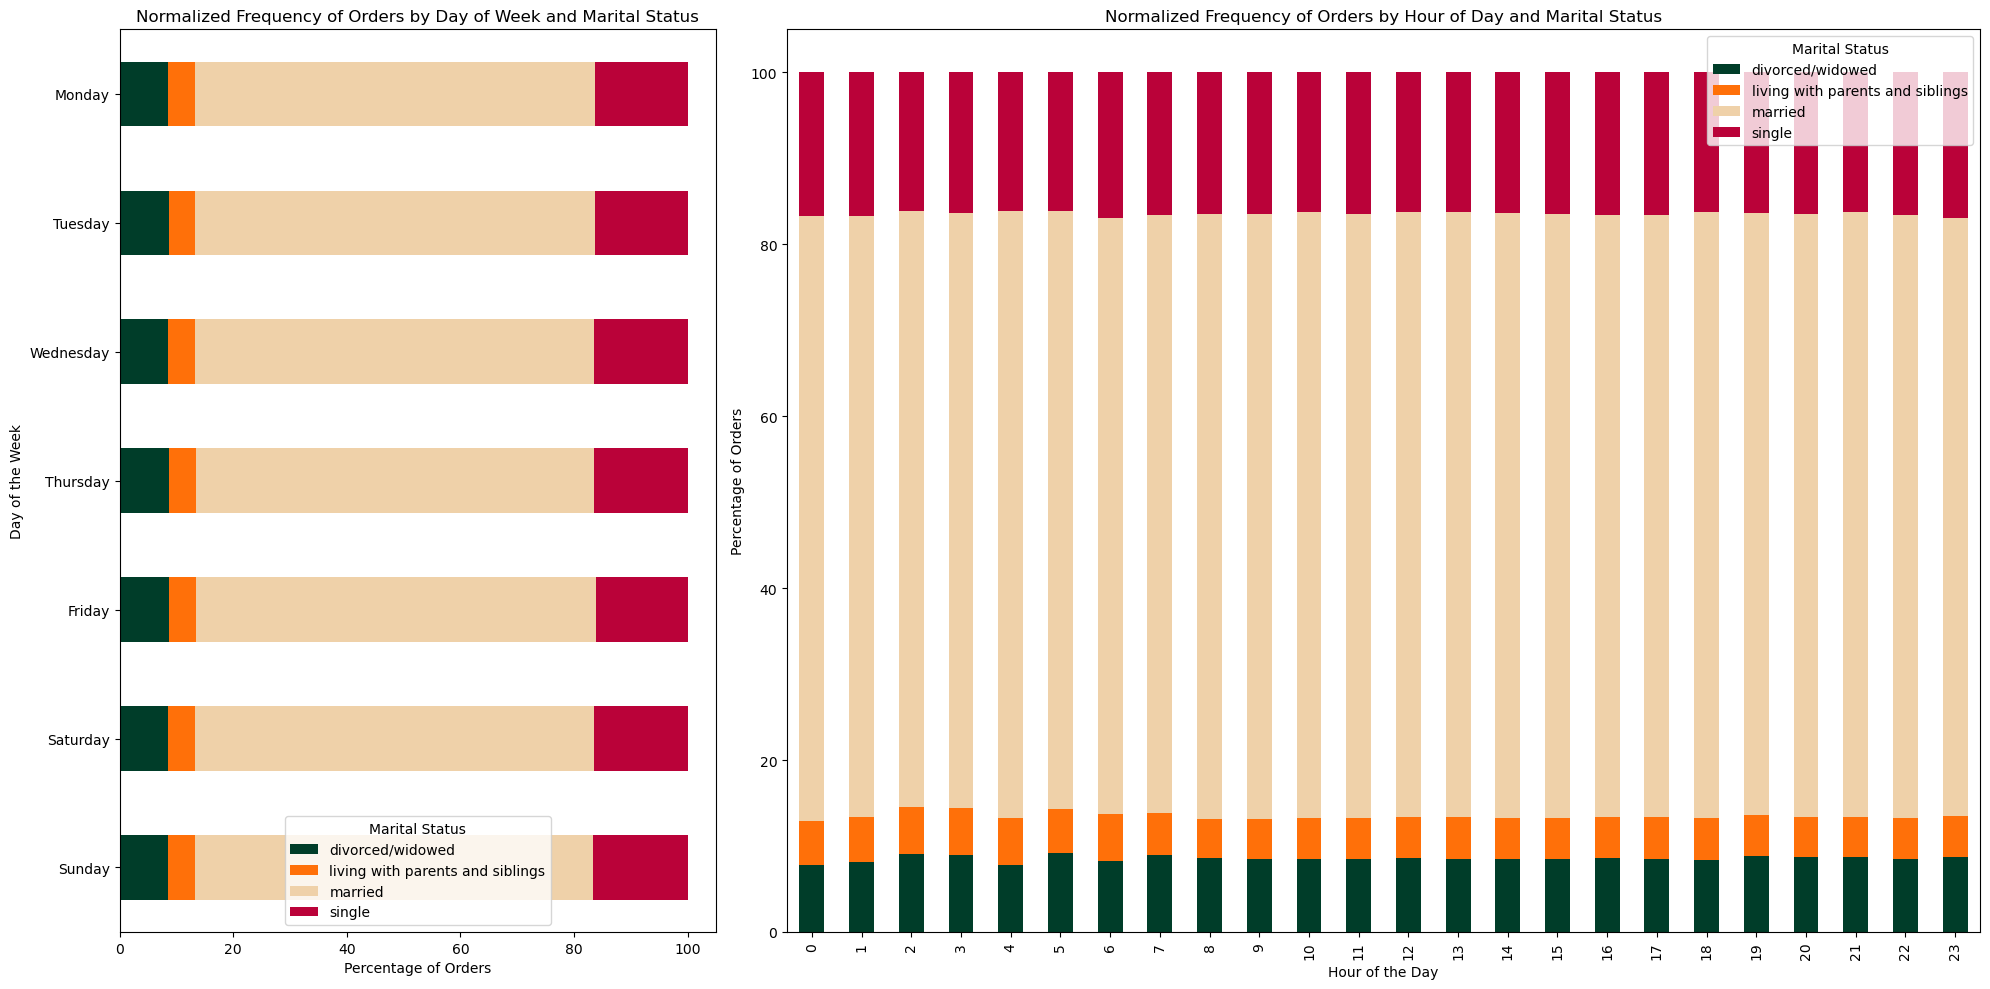

In [44]:
# Pivot table for 'order_dow' by 'marital_status'
pivot_dow_marital = pd.pivot_table(small_df, values='order_id', index='order_dow', columns='marital_status', aggfunc='count', fill_value=0)

# Pivot table for 'order_hour_of_day' by 'marital_status'
pivot_hour_marital = pd.pivot_table(small_df, values='order_id', index='order_hour_of_day', columns='marital_status', aggfunc='count', fill_value=0)

# Normalize the pivot tables
pivot_dow_marital_normalized = pivot_dow_marital.div(pivot_dow_marital.sum(axis=1), axis=0) * 100
pivot_hour_marital_normalized = pivot_hour_marital.div(pivot_hour_marital.sum(axis=1), axis=0) * 100

# Reorder the index for 'order_dow' to match the desired order and then invert the sorting
ordered_days = [1, 0, 6, 5, 4, 3, 2]  # Sunday to Monday with 0 as Saturday
pivot_dow_marital_normalized = pivot_dow_marital_normalized.reindex(ordered_days)

# Create a figure with gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Plot 'order_dow' by 'region' as a horizontal bar chart with inverted sorting
ax0 = plt.subplot(gs[0])
pivot_dow_marital_normalized.plot(kind='barh', stacked=True, ax=ax0, color=custom_colors)
ax0.set_title('Normalized Frequency of Orders by Day of Week and Marital Status')
ax0.set_xlabel('Percentage of Orders')
ax0.set_ylabel('Day of the Week')
ax0.set_yticklabels(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'])
ax0.legend(title='Marital Status')

# Plot 'order_hour_of_day' by 'region' and 'customer_segment'
ax1 = plt.subplot(gs[1])
pivot_hour_marital_normalized.plot(kind='bar', stacked=True, ax=ax1, color=custom_colors)
ax1.set_title('Normalized Frequency of Orders by Hour of Day and Marital Status')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Percentage of Orders')
ax1.legend(title='Marital Status')

plt.tight_layout()
plt.show()

Married individuals are the primary customers, consistently placing the most orders across all days and hours.

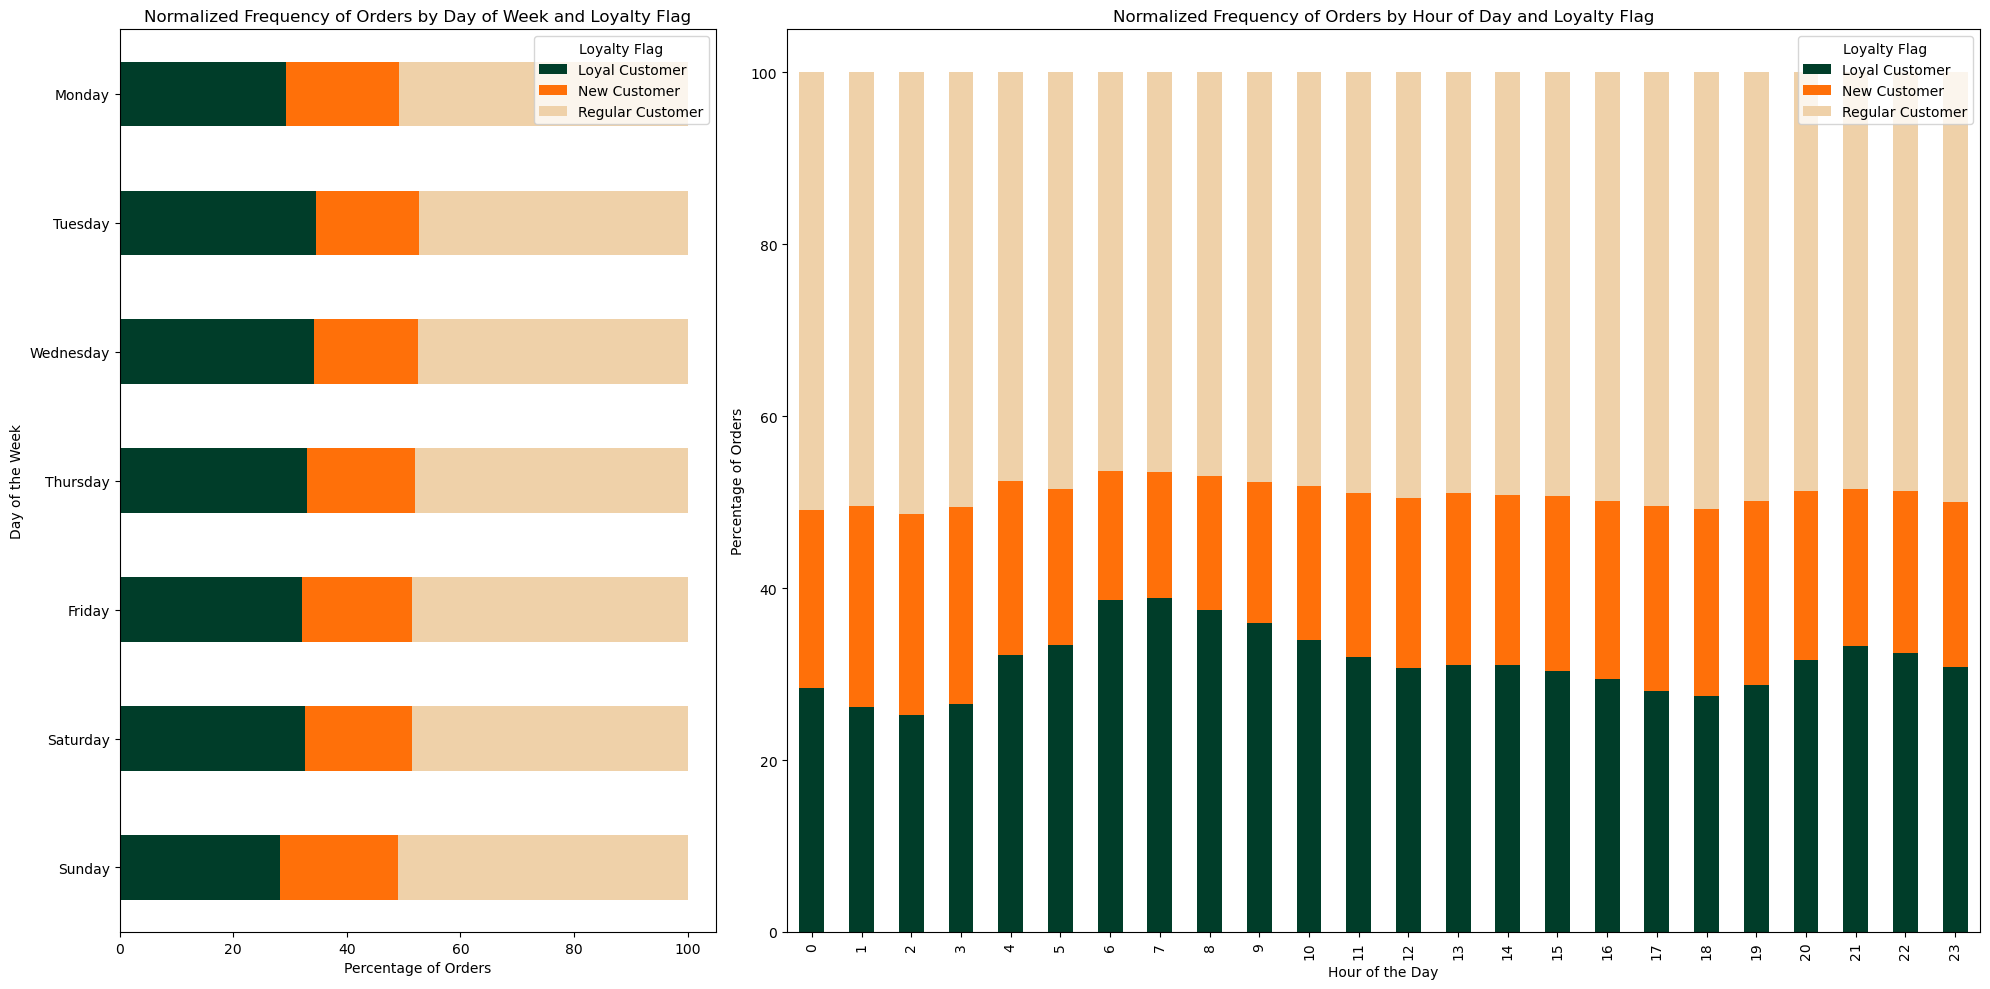

In [45]:
# Pivot table for 'order_dow' by 'loyalty_flag'
pivot_dow_loyalty = pd.pivot_table(small_df, values='order_id', index='order_dow', columns='loyalty_flag', aggfunc='count', fill_value=0)

# Pivot table for 'order_hour_of_day' by 'loyalty_flag'
pivot_hour_loyalty = pd.pivot_table(small_df, values='order_id', index='order_hour_of_day', columns='loyalty_flag', aggfunc='count', fill_value=0)

# Normalize the pivot tables
pivot_dow_loyalty_normalized = pivot_dow_loyalty.div(pivot_dow_loyalty.sum(axis=1), axis=0) * 100
pivot_hour_loyalty_normalized = pivot_hour_loyalty.div(pivot_hour_loyalty.sum(axis=1), axis=0) * 100

# Reorder the index for 'order_dow' to match the desired order and then invert the sorting
ordered_days = [1, 0, 6, 5, 4, 3, 2]  # Sunday to Monday with 0 as Saturday
pivot_dow_marital_normalized = pivot_dow_marital_normalized.reindex(ordered_days)

# Create a figure with gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Plot 'order_dow' by 'region' as a horizontal bar chart with inverted sorting
ax0 = plt.subplot(gs[0])
pivot_dow_loyalty_normalized.plot(kind='barh', stacked=True, ax=ax0, color=custom_colors)
ax0.set_title('Normalized Frequency of Orders by Day of Week and Loyalty Flag')
ax0.set_xlabel('Percentage of Orders')
ax0.set_ylabel('Day of the Week')
ax0.set_yticklabels(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'])
ax0.legend(title='Loyalty Flag')

# Plot 'order_hour_of_day' by 'region' and 'customer_segment'
ax1 = plt.subplot(gs[1])
pivot_hour_loyalty_normalized.plot(kind='bar', stacked=True, ax=ax1, color=custom_colors)
ax1.set_title('Normalized Frequency of Orders by Hour of Day and Loyalty Flag')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Percentage of Orders')
ax1.legend(title='Loyalty Flag')

plt.tight_layout()
plt.show()

- **Regular Customers are the largest customer segment**, consistently making the most orders across all days and hours, with Loyal Customers having a noticeable presence in the early morning hours.

- **New Customers show a slight increase in orders during peak hours (10 AM to 4 PM)**, suggesting targeted engagement strategies during these times could be beneficial.

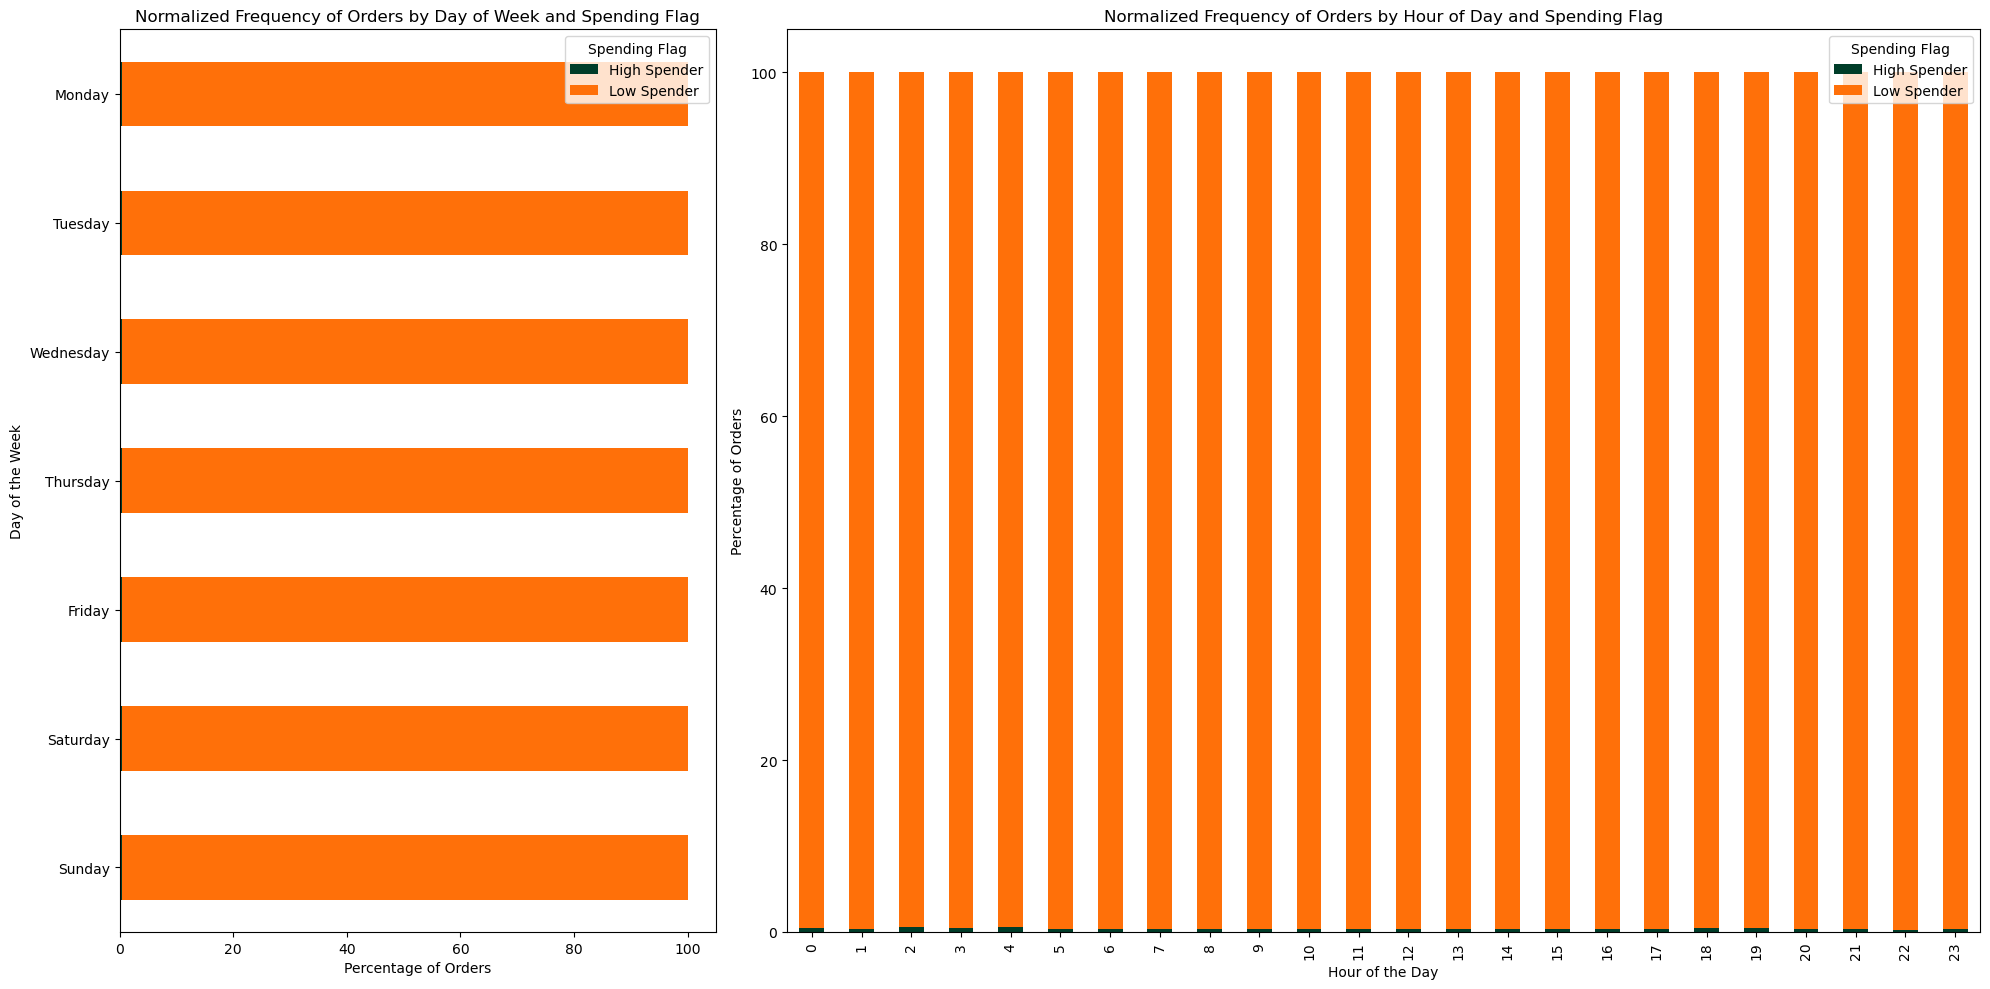

In [46]:
# Pivot table for 'order_dow' by 'spending_flag'
pivot_dow_spending= pd.pivot_table(small_df, values='order_id', index='order_dow', columns='spending_flag', aggfunc='count', fill_value=0)

# Pivot table for 'order_hour_of_day' by 'spending_flag'
pivot_hour_spending = pd.pivot_table(small_df, values='order_id', index='order_hour_of_day', columns='spending_flag', aggfunc='count', fill_value=0)

# Normalize the pivot tables
pivot_dow_spending_normalized = pivot_dow_spending.div(pivot_dow_spending.sum(axis=1), axis=0) * 100
pivot_hour_spending_normalized = pivot_hour_spending.div(pivot_hour_spending.sum(axis=1), axis=0) * 100

# Reorder the index for 'order_dow' to match the desired order and then invert the sorting
ordered_days = [1, 0, 6, 5, 4, 3, 2]  # Sunday to Monday with 0 as Saturday
pivot_dow_marital_normalized = pivot_dow_marital_normalized.reindex(ordered_days)

# Create a figure with gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Plot 'order_dow' by 'region' as a horizontal bar chart with inverted sorting
ax0 = plt.subplot(gs[0])
pivot_dow_spending_normalized.plot(kind='barh', stacked=True, ax=ax0, color=custom_colors)
ax0.set_title('Normalized Frequency of Orders by Day of Week and Spending Flag')
ax0.set_xlabel('Percentage of Orders')
ax0.set_ylabel('Day of the Week')
ax0.set_yticklabels(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'])
ax0.legend(title='Spending Flag')

# Plot 'order_hour_of_day' by 'region' and 'customer_segment'
ax1 = plt.subplot(gs[1])
pivot_hour_spending_normalized.plot(kind='bar', stacked=True, ax=ax1, color=custom_colors)
ax1.set_title('Normalized Frequency of Orders by Hour of Day and Spending Flag')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Percentage of Orders')
ax1.legend(title='Spending Flag')

plt.tight_layout()
plt.show()

Low Spenders (less than $10 per order) dominate the order volume, consistently making up nearly all orders across all days and hours.

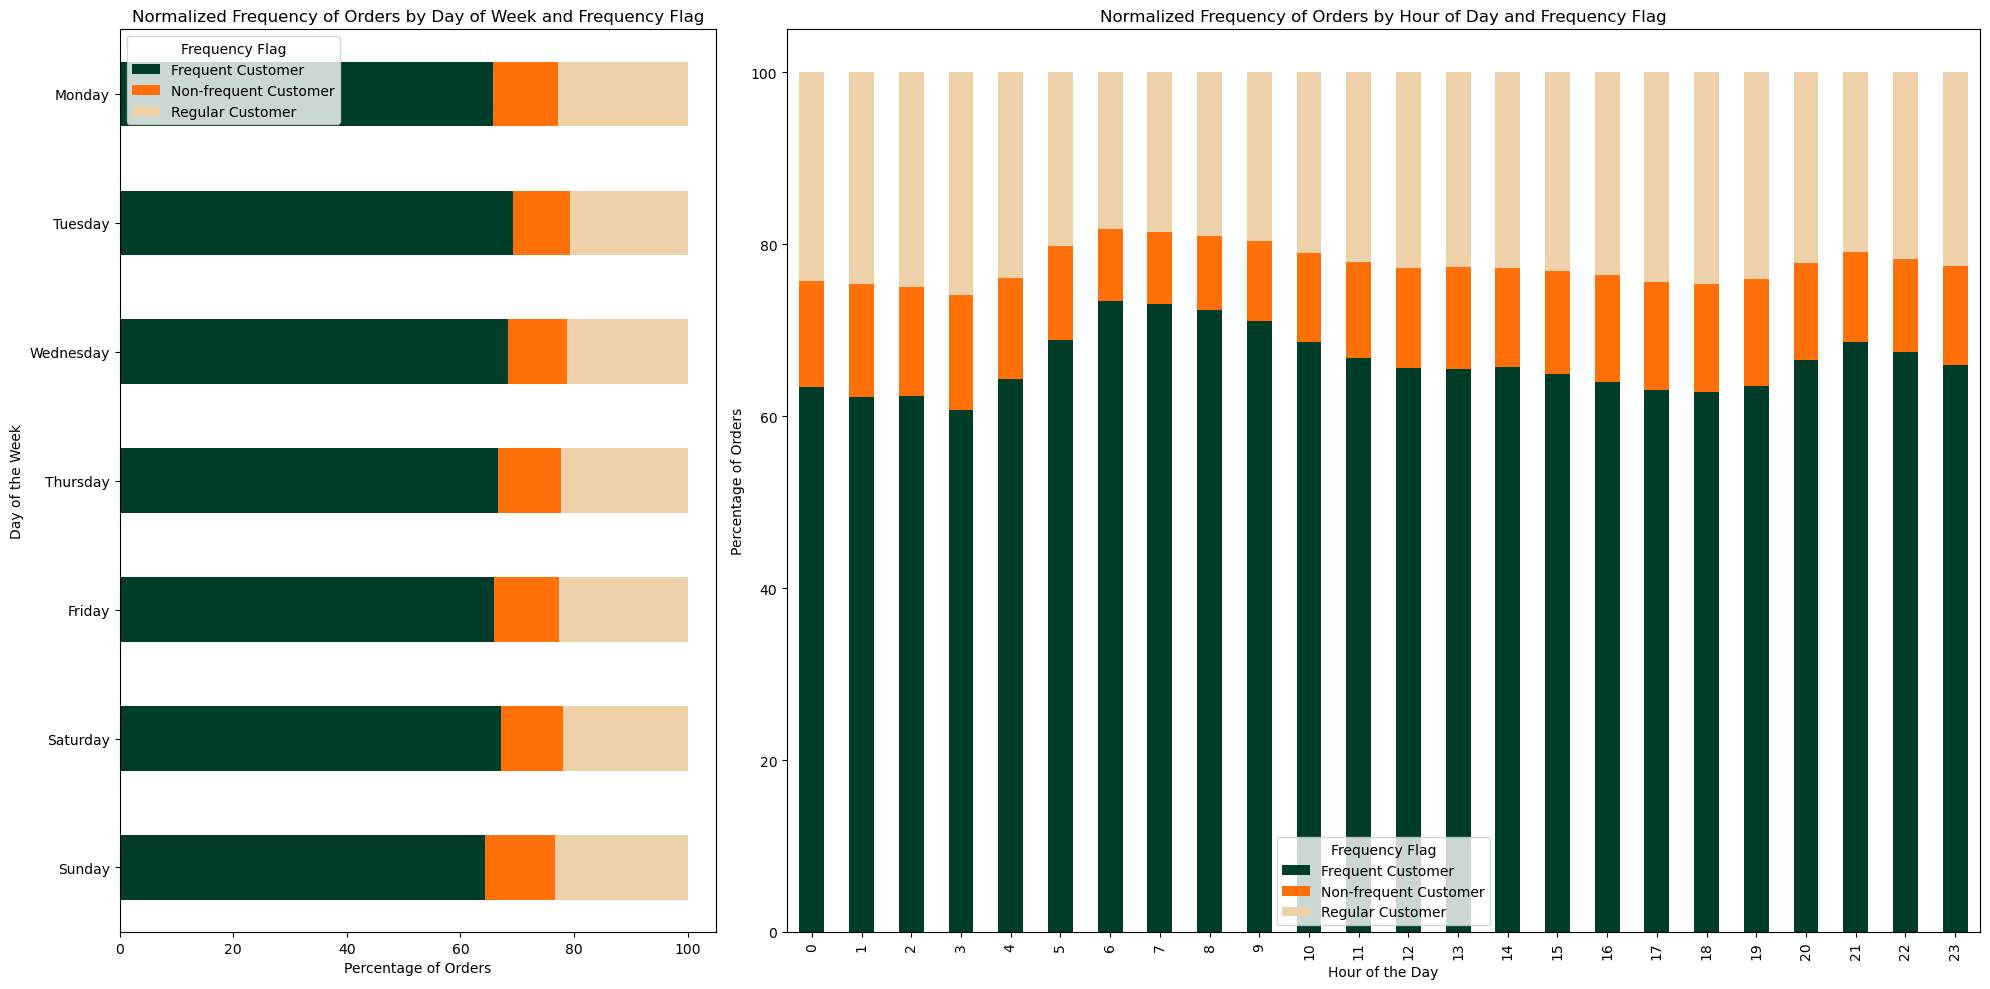

In [47]:
# Pivot table for 'order_dow' by 'frequency_flag'
pivot_dow_frequency= pd.pivot_table(small_df, values='order_id', index='order_dow', columns='frequency_flag', aggfunc='count', fill_value=0)

# Pivot table for 'order_hour_of_day' by 'frequency_flag'
pivot_hour_frequency = pd.pivot_table(small_df, values='order_id', index='order_hour_of_day', columns='frequency_flag', aggfunc='count', fill_value=0)

# Normalize the pivot tables
pivot_dow_frequency_normalized = pivot_dow_frequency.div(pivot_dow_frequency.sum(axis=1), axis=0) * 100
pivot_hour_frequency_normalized = pivot_hour_frequency.div(pivot_hour_frequency.sum(axis=1), axis=0) * 100

# Reorder the index for 'order_dow' to match the desired order and then invert the sorting
ordered_days = [1, 0, 6, 5, 4, 3, 2]  # Sunday to Monday with 0 as Saturday
pivot_dow_marital_normalized = pivot_dow_marital_normalized.reindex(ordered_days)

# Create a figure with gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Plot 'order_dow' by 'region' as a horizontal bar chart with inverted sorting
ax0 = plt.subplot(gs[0])
pivot_dow_frequency_normalized.plot(kind='barh', stacked=True, ax=ax0, color=custom_colors)
ax0.set_title('Normalized Frequency of Orders by Day of Week and Frequency Flag')
ax0.set_xlabel('Percentage of Orders')
ax0.set_ylabel('Day of the Week')
ax0.set_yticklabels(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'])
ax0.legend(title='Frequency Flag')

# Plot 'order_hour_of_day' by 'region' and 'customer_segment'
ax1 = plt.subplot(gs[1])
pivot_hour_frequency_normalized.plot(kind='bar', stacked=True, ax=ax1, color=custom_colors)
ax1.set_title('Normalized Frequency of Orders by Hour of Day and Frequency Flag')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Percentage of Orders')
ax1.legend(title='Frequency Flag')

plt.tight_layout()
plt.show()

Frequent Customers consistently make the most orders across all days and hours. **Non-frequent Customers' orders increase during peak hours (10 AM to 4 PM)**, suggesting targeted strategies could boost their engagement during these times.

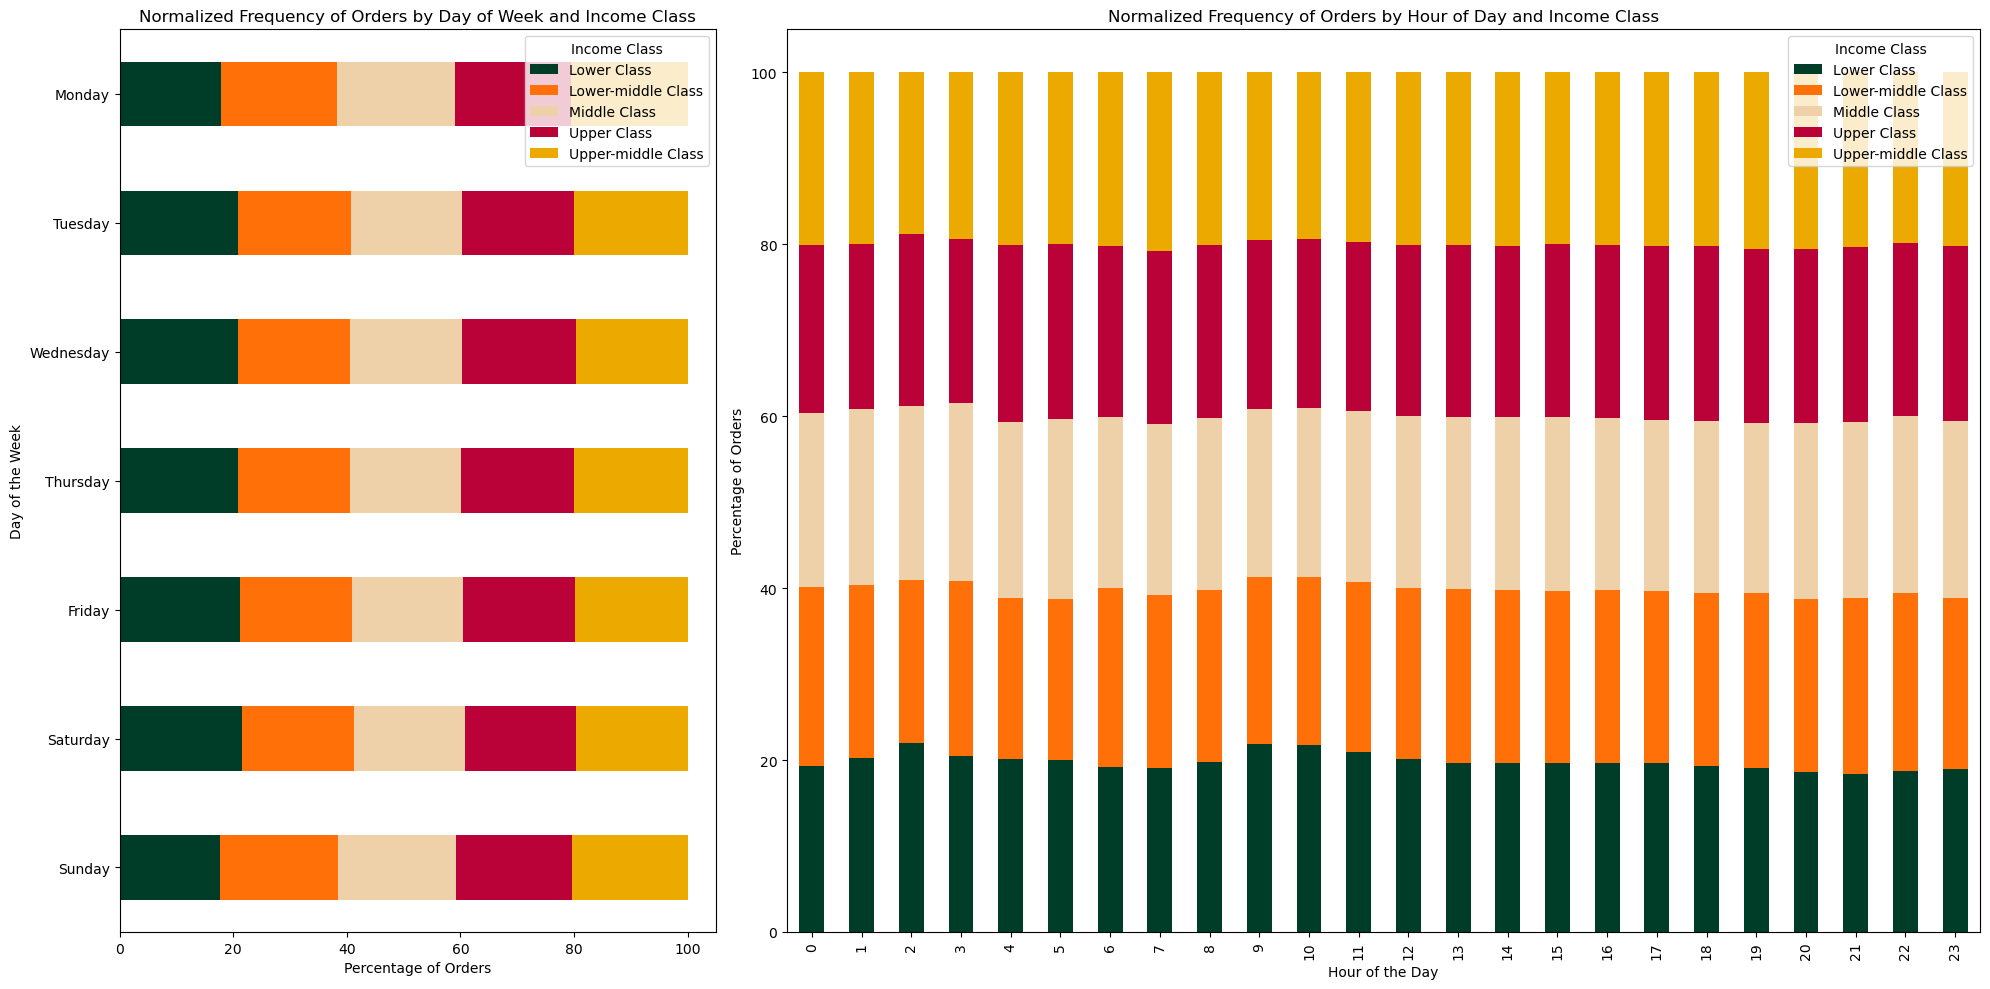

In [48]:
# Pivot table for 'order_dow' by 'income_class'
pivot_dow_income = pd.pivot_table(small_df, values='order_id', index='order_dow', columns='income_class', aggfunc='count', fill_value=0)

# Pivot table for 'order_hour_of_day' by 'income_class'
pivot_hour_income = pd.pivot_table(small_df, values='order_id', index='order_hour_of_day', columns='income_class', aggfunc='count', fill_value=0)

# Normalize the pivot tables
pivot_dow_income_normalized = pivot_dow_income.div(pivot_dow_income.sum(axis=1), axis=0) * 100
pivot_hour_income_normalized = pivot_hour_income.div(pivot_hour_income.sum(axis=1), axis=0) * 100

# Reorder the index for 'order_dow' to match the desired order and then invert the sorting
ordered_days = [1, 0, 6, 5, 4, 3, 2]  # Sunday to Monday with 0 as Saturday
pivot_dow_marital_normalized = pivot_dow_marital_normalized.reindex(ordered_days)

# Create a figure with gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Plot 'order_dow' by 'region' as a horizontal bar chart with inverted sorting
ax0 = plt.subplot(gs[0])
pivot_dow_income_normalized.plot(kind='barh', stacked=True, ax=ax0, color=custom_colors)
ax0.set_title('Normalized Frequency of Orders by Day of Week and Income Class')
ax0.set_xlabel('Percentage of Orders')
ax0.set_ylabel('Day of the Week')
ax0.set_yticklabels(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'])
ax0.legend(title='Income Class')

# Plot 'order_hour_of_day' by 'region' and 'customer_segment'
ax1 = plt.subplot(gs[1])
pivot_hour_income_normalized.plot(kind='bar', stacked=True, ax=ax1, color=custom_colors)
ax1.set_title('Normalized Frequency of Orders by Hour of Day and Income Class')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Percentage of Orders')
ax1.legend(title='Income Class')

plt.tight_layout()
plt.show()

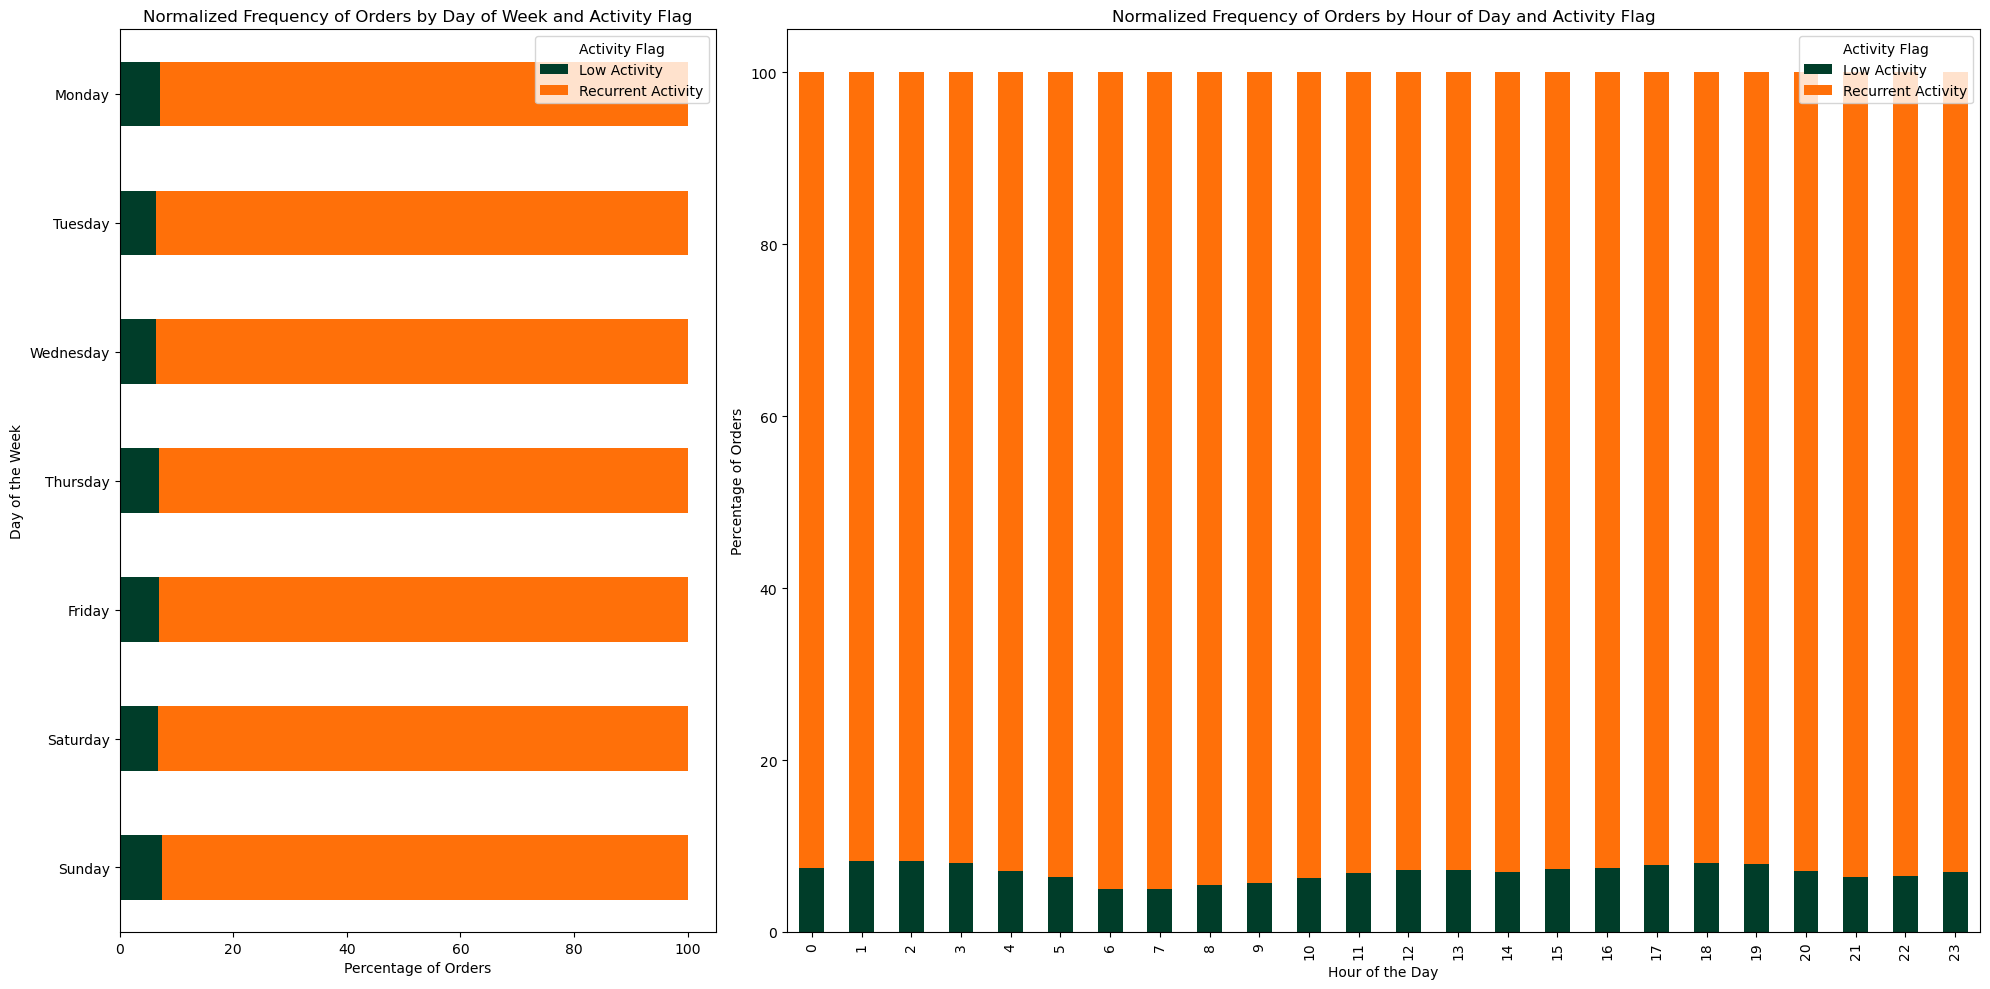

In [49]:
# Pivot table for 'order_dow' by 'activity_flag'
pivot_dow_activity = pd.pivot_table(small_df, values='order_id', index='order_dow', columns='activity_flag', aggfunc='count', fill_value=0)

# Pivot table for 'order_hour_of_day' by 'activity_flag'
pivot_hour_activity= pd.pivot_table(small_df, values='order_id', index='order_hour_of_day', columns='activity_flag', aggfunc='count', fill_value=0)

# Normalize the pivot tables
pivot_dow_activity_normalized = pivot_dow_activity.div(pivot_dow_activity.sum(axis=1), axis=0) * 100
pivot_hour_activity_normalized = pivot_hour_activity.div(pivot_hour_activity.sum(axis=1), axis=0) * 100

# Reorder the index for 'order_dow' to match the desired order and then invert the sorting
ordered_days = [1, 0, 6, 5, 4, 3, 2]  # Sunday to Monday with 0 as Saturday
pivot_dow_marital_normalized = pivot_dow_marital_normalized.reindex(ordered_days)

# Create a figure with gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Plot 'order_dow' by 'region' as a horizontal bar chart with inverted sorting
ax0 = plt.subplot(gs[0])
pivot_dow_activity_normalized.plot(kind='barh', stacked=True, ax=ax0, color=custom_colors)
ax0.set_title('Normalized Frequency of Orders by Day of Week and Activity Flag')
ax0.set_xlabel('Percentage of Orders')
ax0.set_ylabel('Day of the Week')
ax0.set_yticklabels(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'])
ax0.legend(title='Activity Flag')

# Plot 'order_hour_of_day' by 'region' and 'customer_segment'
ax1 = plt.subplot(gs[1])
pivot_hour_activity_normalized.plot(kind='bar', stacked=True, ax=ax1, color=custom_colors)
ax1.set_title('Normalized Frequency of Orders by Hour of Day and Activity Flag')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Percentage of Orders')
ax1.legend(title='Activity Flag')

plt.tight_layout()
plt.show()

- **Customers with Recurrent Activity dominate the order volume**, consistently making up nearly all orders across all days and hours.

- **Low Activity customers represent a very small proportion of orders**, indicating that most customers are regular, repeat shoppers throughout the week and day.

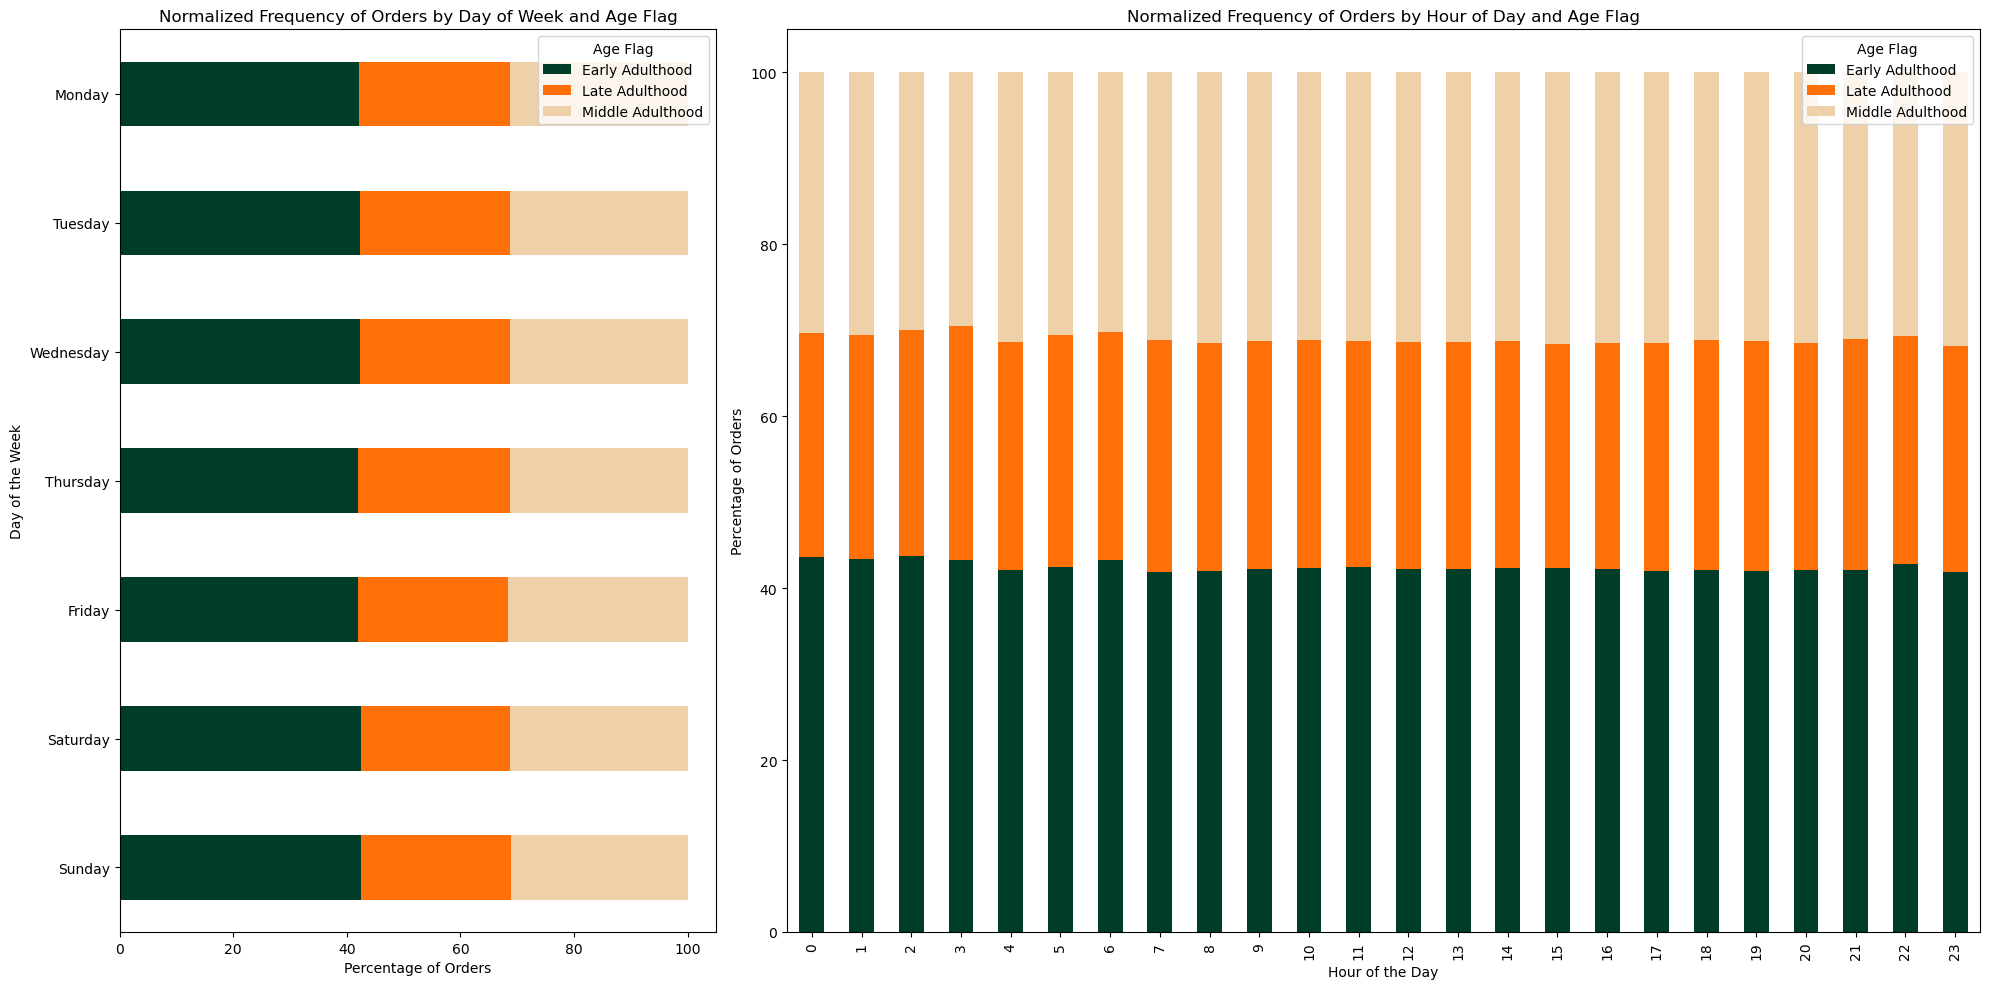

In [50]:
# Pivot table for 'order_dow' by 'age_flag'
pivot_dow_age= pd.pivot_table(small_df, values='order_id', index='order_dow', columns='age_flag', aggfunc='count', fill_value=0)

# Pivot table for 'order_hour_of_day' by 'age_flag'
pivot_hour_age = pd.pivot_table(small_df, values='order_id', index='order_hour_of_day', columns='age_flag', aggfunc='count', fill_value=0)

# Normalize the pivot tables
pivot_dow_age_normalized = pivot_dow_age.div(pivot_dow_age.sum(axis=1), axis=0) * 100
pivot_hour_age_normalized = pivot_hour_age.div(pivot_hour_age.sum(axis=1), axis=0) * 100

# Reorder the index for 'order_dow' to match the desired order and then invert the sorting
ordered_days = [1, 0, 6, 5, 4, 3, 2]  # Sunday to Monday with 0 as Saturday
pivot_dow_marital_normalized = pivot_dow_marital_normalized.reindex(ordered_days)

# Create a figure with gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Plot 'order_dow' by 'region' as a horizontal bar chart with inverted sorting
ax0 = plt.subplot(gs[0])
pivot_dow_age_normalized.plot(kind='barh', stacked=True, ax=ax0, color=custom_colors)
ax0.set_title('Normalized Frequency of Orders by Day of Week and Age Flag')
ax0.set_xlabel('Percentage of Orders')
ax0.set_ylabel('Day of the Week')
ax0.set_yticklabels(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'])
ax0.legend(title='Age Flag')

# Plot 'order_hour_of_day' by 'region' and 'customer_segment'
ax1 = plt.subplot(gs[1])
pivot_hour_age_normalized.plot(kind='bar', stacked=True, ax=ax1, color=custom_colors)
ax1.set_title('Normalized Frequency of Orders by Hour of Day and Age Flag')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Percentage of Orders')
ax1.legend(title='Age Flag')

plt.tight_layout()
plt.show()

**Customers in Early Adulthood make the most orders across all days and hours**, highlighting their significant role in overall order volume.

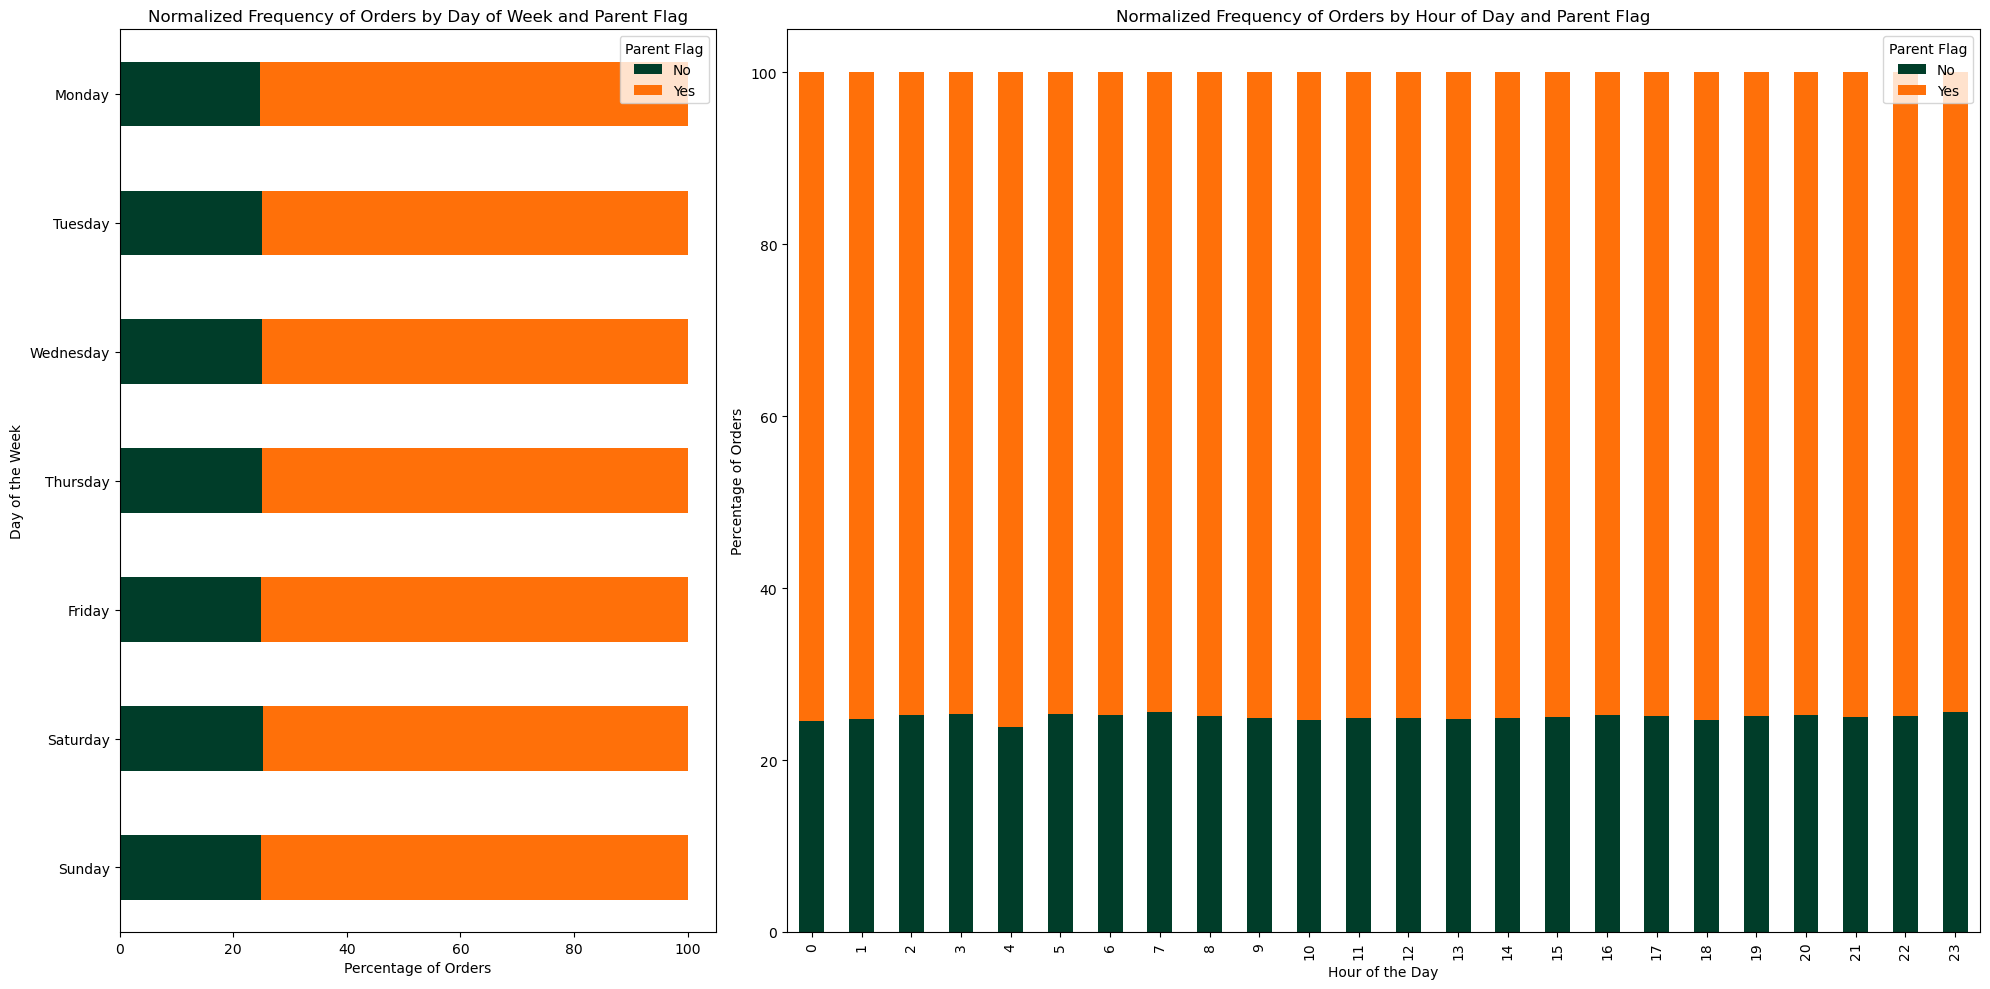

In [51]:
# Pivot table for 'order_dow' by 'is_parent'
pivot_dow_parent = pd.pivot_table(small_df, values='order_id', index='order_dow', columns='is_parent', aggfunc='count', fill_value=0)

# Pivot table for 'order_hour_of_day' by 'is_parent'
pivot_hour_parent = pd.pivot_table(small_df, values='order_id', index='order_hour_of_day', columns='is_parent', aggfunc='count', fill_value=0)

# Normalize the pivot tables
pivot_dow_parent_normalized = pivot_dow_parent.div(pivot_dow_parent.sum(axis=1), axis=0) * 100
pivot_hour_parent_normalized = pivot_hour_parent.div(pivot_hour_parent.sum(axis=1), axis=0) * 100

# Reorder the index for 'order_dow' to match the desired order and then invert the sorting
ordered_days = [1, 0, 6, 5, 4, 3, 2]  # Sunday to Monday with 0 as Saturday
pivot_dow_marital_normalized = pivot_dow_marital_normalized.reindex(ordered_days)

# Create a figure with gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Plot 'order_dow' by 'region' as a horizontal bar chart with inverted sorting
ax0 = plt.subplot(gs[0])
pivot_dow_parent_normalized.plot(kind='barh', stacked=True, ax=ax0, color=custom_colors)
ax0.set_title('Normalized Frequency of Orders by Day of Week and Parent Flag')
ax0.set_xlabel('Percentage of Orders')
ax0.set_ylabel('Day of the Week')
ax0.set_yticklabels(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'])
ax0.legend(title='Parent Flag')

# Plot 'order_hour_of_day' by 'region' and 'customer_segment'
ax1 = plt.subplot(gs[1])
pivot_hour_parent_normalized.plot(kind='bar', stacked=True, ax=ax1, color=custom_colors)
ax1.set_title('Normalized Frequency of Orders by Hour of Day and Parent Flag')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Percentage of Orders')
ax1.legend(title='Parent Flag')

plt.tight_layout()
plt.show()

**Non-parents represent a very small proportion of orders**, indicating that the majority of customers placing orders are parents throughout the week and day.

# ANALYSIS QUESTIONS

### What are the busiest days of the week and hours of the day for orders?
Weekends (especially Saturdays) are the busiest days for orders. Peak ordering times are from 10 AM to 4 PM.

### When do customers spend the most money during the day?
The distribution of the volume of orders and total revenue by hour are highly similar, indicating a stable average spending per order throughout the day, with both metrics peaking from 10 AM to 4 PM and dipping during early mornings and late evenings.

### Can we create simple price range groupings for products?
The product_range categorical variable is defined as:

- If price is greater than $15, high-range product.
- If price is between $5 and $15, mid-range product.
- If price is less than $5, low-range product.

### Which departments have the highest frequency of product orders?
- Produce is the most popular department, accounting for nearly 30% of orders, followed by Dairy Eggs, highlighting key areas of customer demand.
- Departments like Snacks, Beverages, Frozen, and Pantry also show significant order volumes, indicating a wide range of customer preferences and opportunities for targeted marketing.

### What is the distribution of brand loyalty among customers?
- Frequent Customers form the largest segment, predominantly consisting of loyal and regular customers, while non-frequent customers are mainly new and regular customers.
- Over half of the customer base consists of new customers, indicating significant potential for converting them into regular or loyal customers through targeted engagement strategies.

### How do ordering habits differ based on customer loyalty status?
Regular Customers dominate orders across most departments, highlighting their broad engagement with various product categories. Loyal Customers show significant activity in babies and bulk departments, indicating opportunities for targeted marketing strategies for this segment of customers.

### How do ordering habits vary by region?
The South region leads in order volume across all departments, with no significant distinctions observed.

### Is there a connection between age and family status in terms of ordering habits?
- Parents dominate the order volume across all departments, highlighting their significant role in the customer base.
- Married individuals place the highest percentage of orders across all department, making them the primary customer segment.
- Single customers also show significant engagement, suggesting opportunities for targeted marketing to this segment as well.

### What classifications can we identify from demographic information (e.g., age, income, types of goods, family status)?
I created several customer profiles to classify customer behavior based on the demographic and order information available in the data, including:
- Loyalty Flag: Based on the total number of orders per customer.
- Spending Flag:  Based on the average spending amount pers customer.
- Frequency Flag: Based on the median number of days since previous order per customer.
- Income Class: Based on the annual income per customer.
- Age Flag: Based on the customer’s age.
- Is Parent: Based on whether a customer has dependents or not.
- Hour Period: Based on the hour of the day for each order.

### What differences exist in ordering habits among different customer profiles (e.g., order price, order frequency, types of products ordered)?
- **Order Price**: Low Spenders (less than $10 per order) are the predominant group, with high spenders making up a very small proportion of orders.
- **Order Frequency**: Frequent Customers place the majority of orders, with a noticeable increase in orders from non-frequent customers during peak hours.
- **Types of Products Ordered**: Produce is the most popular department, followed by Dairy Eggs, Snacks, and Beverages. These trends are consistent across different customer profiles.

- **Customer Profiles**:
    - Married individuals, parents, and those in Early Adulthood are the dominant customer segments.
    - Regular Customers make the most orders, with new customers showing increased activity during peak hours.
    - Regional differences highlight the West and South as leading regions in order volume.

# RECOMMENDATIONS

To effectively engage key customer segments, tailor marketing campaigns to married individuals and parents, who dominate order volumes. Focus on family-oriented products and promotions, offering bundle deals and discounts on bulk purchases to appeal to their needs. Additionally, create personalized campaigns that resonate with these segments, such as family meal planning tips and home organization hacks.

Capitalize on peak shopping hours (10 AM to 4 PM) by offering special promotions and limited-time offers to new and frequent customers, encouraging higher spending and repeat purchases. Schedule advertisements and promotions during low activity periods (early mornings and late evenings) to drive more traffic during these times. Strengthen customer loyalty programs by rewarding regular and loyal customers with exclusive deals and personalized recommendations based on past purchases.

Develop region-specific marketing strategies, with a focus on the West and South regions, which show the highest order volumes. Create campaigns that cater to local preferences and popular product categories, such as beverages and pantry items in the West, and canned goods and bakery products in the South. By leveraging data insights to refine customer segmentation and personalize marketing efforts, the company can boost sales and enhance customer loyalty across all regions and departments.